# Analyzing the rise and decline of current prominent countries

This research came about after reading the book Principles for Dealing with the Changing World Order by Ray Dalio, which comes highly recommended to any geopolitics/global macroeconomics enthusiasts. After reading the Appendix at the end of the book, wherein Dalio et al. devised a generative model to create composite indices reflecting the strength of a country based on constituents that he decided upon. This was a fascinating concept to me, one which I wanted to attempt to replicate using other methodologies to A. evaluate the countries's economic strengths based on certain indicators, B. verify the integrity of these indicators via unsupervised learning algorithms, and lastly C. attempt to predict the trajectory these countries are headed towards using Reccurrent Neural Networks. The main goal of this analysis is to apply a statistical/deep learning approach to highlighting which countries are rising as dominant global powers and which are waning in power.

Note: This project is by no means an attempt to replicate the research done by Ray Dalio and the folks at Bridgewater Associates; where the process most likely involved millions of time series being analyzed as constituents for each indicator and the data went through significant scrutinization and processing, such that earliest records extended all the way back to the 16th century. For our work here, we are mainly interested in the application of Multi - Criteria Decision Making techniques as well as deep learning frameworks into analyzing countries of our own choosing. The data mainly came from reliable open sources (World Bank, dbnomics, ycharts, Macro Trends, etc.) but unfortunately these sources are not always consistent across time and countries. Moreover, certain countries proved rather difficult to gather data on for various reasons, so what we will be able to achieve is a high - level perspective on the overall positions of countries, but not all the data presented here will be absolutely correct on all accounts (something to keep in mind).

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [88]:
data_folder = 'data'
data_frames = {}

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        country = file.replace('.csv', '')
        data_frames[country] = pd.read_csv(os.path.join(data_folder, file))
    
for df_name, df in data_frames.items():
    print(f"Data frame '{df_name}'")

Data frame 'Australia'
Data frame 'Belgium'
Data frame 'Canada'
Data frame 'China'
Data frame 'Denmark'
Data frame 'England'
Data frame 'Finland'
Data frame 'France'
Data frame 'Germany'
Data frame 'India'
Data frame 'Italy'
Data frame 'Japan'
Data frame 'Korea'
Data frame 'Netherlands'
Data frame 'Russia'
Data frame 'Spain'
Data frame 'Sweden'
Data frame 'Switzerland'
Data frame 'US'


In [89]:
country_str = []
for country, df in data_frames.items():
    country_str.append(country)

In [90]:
columns = list(df.columns)
# a = columns[-1]
# columns[-2]  = a
# columns[-1] = 'RGDP_rate_of_change'

In [91]:
# fixing

for country, df in data_frames.items():
    data_frames[country] = df.drop(['world gdp', 'Real interest rates (Adjusted for inflation)'], axis=1)
    

# tạo feature mới để ptich
for country, df in data_frames.items():
    df['RGDP % Change'] = df['RGDP ($US)'].pct_change() * 100

for country, df in data_frames.items():
    df['% world gdp'] *= 100

In [92]:
for df_name, df in data_frames.items():
    locals()[df_name] = df

In [93]:
Finland.head()

Year    RGDP ($US)  GDP per capita ($US - Adjusted to PPP)  \
0  1991  127773856786                              17547.4077   
1  1992  112532519246                              17258.7464   
2  1993   89214114708                              17466.1488   
3  1994  103299943085                              18466.3439   
4  1995  134189814815                              19573.7479   

   Unemployment rate (% tot labor force)  Inflation rate  \
0                                  6.503        4.310213   
1                                 11.595        2.919323   
2                                 16.201        2.190653   
3                                 16.426        1.088557   
4                                 17.005        0.791239   

   Govt debt-to-gdp ratio  Current BoP   Labor force participation rate  \
0                    21.9 -6.807373e+09                          63.425   
1                    39.2 -5.115907e+09                          62.096   
2                    54.1 -1.135004e+09                          61.292   
3                    56.1  1.110444e+09                          60.518   
4                    55.2  5.231357e+09                          59.714   

          Trade  % world gdp  RGDP % Change  
0 -1.145210e+09     0.533892            NaN  
1  1.088482e+09     0.439170     -11.928369  
2  4.224687e+09     0.340057     -20.721481  
3  5.877879e+09     0.368961      15.788789  
4  1.026786e+10     0.430434      29.903087

In [94]:
# palette = sns.color_palette("Spectral", len(countries))
# sns.set_style('whitegrid')
# sns.set_style('darkgrid')
# plt.style.use("dark_background")
# plt.rcParams['figure.facecolor'] = 'white'

## A brief overview - data analysis

### Real GDP ($US)

In [95]:
"""
Since many features are are not recorded up to date, to account for this problem each analysis 
of individual attributes for countries will be done on the last recorded observation for that country
"""

last_observation_RGDP = {}
for country, df in data_frames.items():
    last_observation_RGDP[country] = df['RGDP ($US)'].iloc[-1]

[Text(0, 0, 'Australia'),
 Text(1, 0, 'Belgium'),
 Text(2, 0, 'Canada'),
 Text(3, 0, 'China'),
 Text(4, 0, 'Denmark'),
 Text(5, 0, 'England'),
 Text(6, 0, 'Finland'),
 Text(7, 0, 'France'),
 Text(8, 0, 'Germany'),
 Text(9, 0, 'India'),
 Text(10, 0, 'Italy'),
 Text(11, 0, 'Japan'),
 Text(12, 0, 'Korea'),
 Text(13, 0, 'Netherlands'),
 Text(14, 0, 'Russia'),
 Text(15, 0, 'Spain'),
 Text(16, 0, 'Sweden'),
 Text(17, 0, 'Switzerland'),
 Text(18, 0, 'US')]

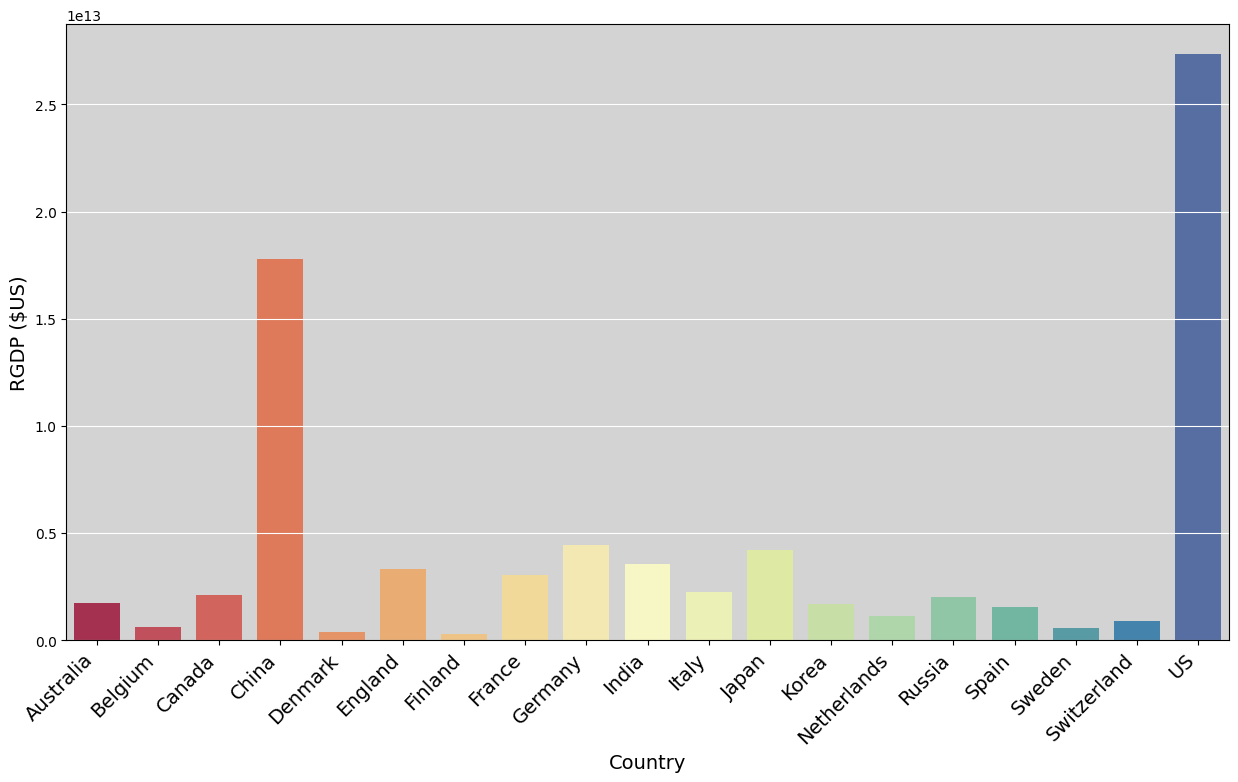

In [96]:
countries = list(last_observation_RGDP.keys())
rgdp_values = list(last_observation_RGDP.values())

fig, ax = plt.subplots(figsize = (15, 8))
ax.set_facecolor('lightgray')
ax.grid(color = 'white')

sns.barplot(x = countries, y = rgdp_values, palette = 'Spectral', alpha = 1, width = 0.75)

# plt.grid()
ax.set_xlabel('Country', fontsize = 14)
ax.set_ylabel('RGDP ($US)', fontsize = 14)
#  ax.set_title('Last Recorded RGDP ($US) for Each Country', fontsize = 16)
ax.set_xticklabels(countries, rotation=45, ha='right', fontsize = 14)

The key observations here are the following:
* US dominance: 

### RGDP % change

In [97]:
color_scale_arr = ['sandybrown', 'seagreen', 'tomato', 'sienna', 'turquoise',
                   'skyblue', 'slateblue', 'slategray', 'slategrey', 'steelblue', 
                   'orchid', 'salmon', 'lightcoral', 'mediumseagreen', 
                   'cornflowerblue', 'darkorange', 'mediumslateblue', 'Gold', 'DarkCyan']

fig = go.Figure()

for country in countries:
    df = data_frames[country]
    color = color_scale_arr[countries.index(country)]
    
    fig.add_trace(go.Scatter(
        x=df['Year'],
        y=df['RGDP % Change'],
        mode='lines',
        name=country,
        line=dict(
            color = color,
            width=2
        )
    ))

fig.update_layout(
    # title='Year-by-Year RGDP % Change for Each Country',
    xaxis=dict(title='Year'),
    yaxis=dict(title='RGDP % Change'),
    plot_bgcolor='lightgray',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            size=10
        ),
        bgcolor='rgba(0,0,0,0)'
    ),
    width = 1500,
    height = 700
)

Key observations:


### Inflation rate

In [98]:
def get_last_valid_value(df, column): # Data null ngu vl
    last_valid_idx = df[column].last_valid_index()
    if last_valid_idx is not None:
        return df[column].loc[last_valid_idx]
    else:
        return None

In [99]:
last_observation_world_percentage = {}
for country, df in data_frames.items():
    share_value = get_last_valid_value(df, '% world gdp')
    last_observation_world_percentage[country] = share_value

countries = list(last_observation_world_percentage.keys())
share_value = list(last_observation_world_percentage.values())

In [100]:
# colors = ['#FFA500', '#FF0000', '#800080']

bubble_sizes = [value * 0.15 for value in share_value]

fig = go.Figure(data=go.Scatter(
    x=countries,
    y=share_value,
    mode='markers',
    marker=dict(
        size=bubble_sizes,
        sizemode='diameter',
        sizeref=0.02,
        sizemin=5,
        color=share_value,
        colorscale='viridis',
        showscale=True,
        opacity=0.8
    ),
    text = share_value,
    textposition='bottom center'
))

fig.update_layout(
    # title=r'% share of world GDP (Last recorded)',
    xaxis=dict(
        title='Country'
        ),
    yaxis=dict(
        showticklabels=False,
        showgrid=True
    ),
    plot_bgcolor='lightgray',
    showlegend=False,
    width = 1200,
    height = 700
)

fig.update_traces(text=share_value, textposition='top center')

### Unemployment rate + Labor force participation rate

In [101]:
last_observation_unemployment = {}
last_observation_labor = {}
for country, df in data_frames.items():
    unemployment_value = get_last_valid_value(df, 'Unemployment rate (% tot labor force)')
    last_observation_unemployment[country] = unemployment_value
    labor_value = get_last_valid_value(df, 'Labor force participation rate')
    last_observation_labor[country] = labor_value

unemployment_values = list(last_observation_unemployment.values())
labor_values = list(last_observation_labor.values())

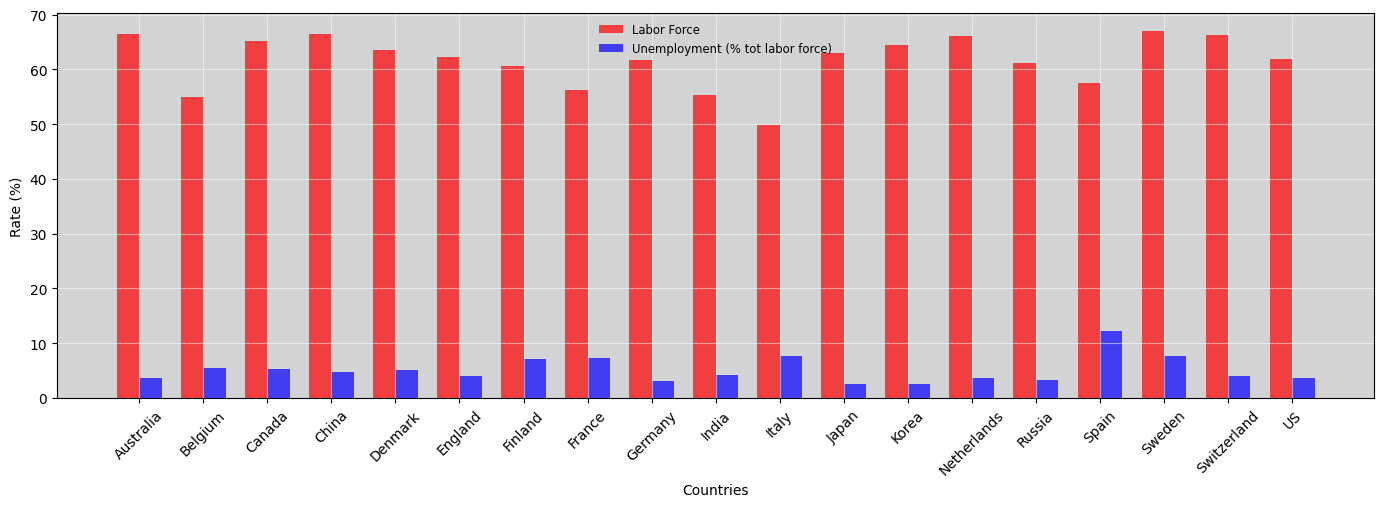

In [102]:
bar_width = 0.35
x = np.arange(len(countries))

fig, ax = plt.subplots(figsize = (17, 5))
ax.set_facecolor('lightgray')

rects1 = ax.bar(x - bar_width/2, labor_values, bar_width, label='Labor Force', color = 'red', alpha = 0.7)
rects2 = ax.bar(x + bar_width/2, unemployment_values, bar_width, label='Unemployment (% tot labor force)', color = 'blue', alpha = 0.7)

ax.grid(color = 'white', alpha = 0.5)
ax.set_xlabel('Countries')
ax.set_ylabel('Rate (%)')
# ax.set_title('Labor Force Participation and Unemployment Rates')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'best', fontsize = 'small', frameon = False)

plt.show()

### Inflation Rate

In [103]:
# color_scale_arr = ['sandybrown', 'seagreen', 'tomato', 'sienna', 'turquoise',
#             'skyblue', 'slateblue', 'slategray', 'slategrey', 'steelblue']

fig = go.Figure()

for country in countries:
    df = data_frames[country]
    color = color_scale_arr[countries.index(country)]
    
    fig.add_trace(go.Scatter(
        x=df['Year'],
        y=df['Inflation rate'],
        mode='lines',
        name=country,
        line=dict(
            color = color,
            width=1.5
        ) 
        # ,fill = 'tozeroy'
    ))

fig.update_layout(
    # title='Historical Inflation Rate data for countries',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Inflation rate (%)'),
    plot_bgcolor='lightgray',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            size=10
        ),
        bgcolor='rgba(0,0,0,0)'
    ),
    width = 1500,
    height = 700
)

## Scoring system using MCDM

### Uncovering missing data

In [104]:
countries = [Australia, Belgium,Canada, China, Denmark, England, Finland, France,Germany, India, Italy,Japan, Korea, Netherlands, Russia,Spain, Sweden, Switzerland, US]
country_str 

['Australia',
 'Belgium',
 'Canada',
 'China',
 'Denmark',
 'England',
 'Finland',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Korea',
 'Netherlands',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'US']

In [105]:
def find_missing_percent(data):
    miss_data = []
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val / data.shape[0]) * 100, 2)
        miss_data.append({'ColumnName': col, 'TotalMissingVals': sum_miss_val, 'PercentMissing': percent_miss_val})
    miss_df = pd.DataFrame(miss_data)
    return miss_df

i = 1
for df in countries:
    missing_data_df = find_missing_percent(df)
    output_file_path = f'missing_report/Missing_data_output_{i}.csv'
    missing_data_df.to_csv(output_file_path, index=False)
    i += 1

### Imputation to handle missing data

In [106]:
from fancyimpute import IterativeImputer

i = 0
for df in countries:
    imputer = IterativeImputer()
    imputed = imputer.fit_transform(df)
    new_df = pd.DataFrame(imputed)
    output_file_path = f'Imputed_data/{country_str[i]}.csv'
    new_df.to_csv(output_file_path, index=False)
    i+=1

In [107]:
data_folder = 'Imputed_data'
data_frames_full = {}

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        country = file.replace('.csv', '')
        data_frames_full[country] = pd.read_csv(os.path.join(data_folder, file))

print('Currently imputed dataframes:')
for df_name, df in data_frames_full.items():
    print(f"Data frame '{df_name}'")

Currently imputed dataframes:
Data frame 'Australia'
Data frame 'Belgium'
Data frame 'Canada'
Data frame 'China'
Data frame 'Denmark'
Data frame 'England'
Data frame 'Finland'
Data frame 'France'
Data frame 'Germany'
Data frame 'India'
Data frame 'Italy'
Data frame 'Japan'
Data frame 'Korea'
Data frame 'Netherlands'
Data frame 'Russia'
Data frame 'Spain'
Data frame 'Sweden'
Data frame 'Switzerland'
Data frame 'US'


In [108]:
list1 = []
for a,b in data_frames_full.items():
    list1.append(b)


len(list1)

19

In [109]:
all_years = list1[0]['0'].unique()

# Dictionary to hold DataFrames for each year
yearly_dfs = {}

for year in all_years:
    yearly_data = pd.concat([df[df['0'] == year] for df in list1], ignore_index=True)
    # print(yearly_data)
    yearly_dfs[int(year)] = pd.DataFrame(yearly_data)

In [110]:
countries_name = country_str

In [111]:
# columns = list(df.columns)
# Fixing - Hàm bỏ RIR
for years in yearly_dfs.values():
    years.drop(years.columns[8], axis=1, inplace=True)

In [112]:
columns

['Year',
 'RGDP ($US)',
 'GDP per capita ($US - Adjusted to PPP)',
 'Unemployment rate (% tot labor force)',
 'Inflation rate',
 'Govt debt-to-gdp ratio',
 'Current BoP ',
 'Labor force participation rate',
 'Real interest rates (Adjusted for inflation)',
 'Trade',
 'world gdp',
 '% world gdp']

In [113]:
for years in yearly_dfs.values():
    years.columns = ['Year',
                    'RGDP ($US)',
                    'GDP per capita ($US - Adjusted to PPP)',
                    'Unemployment rate (% tot labor force)',
                    'Inflation rate',
                    'Govt debt-to-gdp ratio',
                    'Current BoP ',
                    'Labor force participation rate',
                    'Trade',
                    'RGDP % Change']
    years.index = countries_name

In [114]:
yearly_dfs[2004]

Year    RGDP ($US)  GDP per capita ($US - Adjusted to PPP)  \
Australia    2004.0  6.146600e+11                            31763.796090   
Belgium      2004.0  3.692147e+11                            32063.982700   
Canada       2004.0  1.026690e+12                            33927.669700   
China        2004.0  1.955347e+12                             4427.657140   
Denmark      2004.0  2.513730e+11                            32939.630470   
England      2004.0  2.421525e+12                            32055.471760   
Finland      2004.0  1.974794e+11                            31202.632700   
France       2004.0  2.119633e+12                            29056.005260   
Germany      2004.0  2.814354e+12                            31334.731520   
India        2004.0  7.091527e+11                             2681.216657   
Italy        2004.0  1.806543e+12                            29555.556470   
Japan        2004.0  4.893116e+12                            30830.658400   
Korea        2004.0  7.931756e+11                            23773.828700   
Netherlands  2004.0  6.583801e+11                            40436.618000   
Russia       2004.0  5.910167e+11                            10226.766600   
Spain        2004.0  1.069056e+12                            26144.383160   
Sweden       2004.0  3.851180e+11                            33859.573190   
Switzerland  2004.0  4.039129e+11                            40176.570700   
US           2004.0  1.221720e+13                            41724.641200   

             Unemployment rate (% tot labor force)  Inflation rate  \
Australia                                    5.399        2.340000   
Belgium                                      7.363        2.097283   
Canada                                       7.185        1.860000   
China                                        4.490        3.824637   
Denmark                                      5.900        1.150000   
England                                      4.594        1.390398   
Finland                                     10.358        0.187121   
France                                       8.914        2.140000   
Germany                                     10.727        1.670000   
India                                        8.551        3.770000   
Italy                                        7.866        2.210000   
Japan                                        4.734       -0.008573   
Korea                                        3.420        3.590663   
Netherlands                                  4.646        1.263647   
Russia                                       7.763       10.888616   
Spain                                       11.090        3.040000   
Sweden                                       6.693        0.370000   
Switzerland                                  4.316        0.802909   
US                                           5.529        2.677237   

             Govt debt-to-gdp ratio  Current BoP   \
Australia                 22.861071 -4.128695e+10   
Belgium                   98.098797  1.143441e+10   
Canada                    46.800986  2.323555e+10   
China                     26.393230  6.894096e+10   
Denmark                   44.200000  5.940838e+09   
England                   90.511682 -5.550474e+10   
Finland                   44.900000  1.255675e+10   
France                    64.642413  9.166417e+09   
Germany                   65.200000  1.275059e+11   
India                     62.592977  7.801957e+08   
Italy                    105.100000 -8.978989e+09   
Japan                    127.547630  1.819937e+11   
Korea                     23.251000  2.928990e+10   
Netherlands               50.300000  6.730822e+09   
Russia                    20.800000  5.855984e+10   
Spain                     43.469121 -5.867703e+10   
Sweden                    57.597253  2.290229e+10   
Switzerland               29.365369  5.043962e+10   
US                        56.662273 -6.358870e+11   

            

### CODAS

In [115]:
import pymcdm.methods.codas as codas
from pymcdm import weights
from pymcdm.helpers import rrankdata

from pymcdm.normalizations import minmax_normalization, sum_normalization, linear_normalization
from pymcdm.correlations import pearson
from scipy.linalg import null_space
from pymcdm.helpers import correlation_matrix, normalize_matrix
from sklearn.preprocessing import MinMaxScaler
from pymcdm.weights import *

In [116]:
data2023 = yearly_dfs[2023].drop('Year',axis = 1)
benefit_vector = [1,1,-1,-1,-1,1,1,1,1,1,1]

In [117]:
data2023.columns

Index(['RGDP ($US)', 'GDP per capita ($US - Adjusted to PPP)',
       'Unemployment rate (% tot labor force)', 'Inflation rate',
       'Govt debt-to-gdp ratio', 'Current BoP ',
       'Labor force participation rate', 'Trade', 'RGDP % Change'],
      dtype='object')

In [118]:
import pymcdm
library_directory = os.path.dirname(pymcdm.__file__)
print("Directory of the library:", library_directory)

Directory of the library: c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymcdm


In [119]:
# def vec_nor(x,cost  ):

#     if cost:
#         return 1 - (x / np.sqrt(np.sum(x ** 2)))
#     return x / np.sqrt(np.sum(x ** 2))
# #----------------------------------------------------------------

# def nor_dataframe(df):
#     cost = [False, False, True, True, True, False, False, False, False, False, False]
#     df_nor = pd.DataFrame()
#     for index,i in enumerate(df.columns):
#             df_nor[i] =  vec_nor(df[i],cost = cost[index])
            
#     return df_nor
# nor_dataframe(data2023)

In [120]:
data2023

RGDP ($US)  GDP per capita ($US - Adjusted to PPP)  \
Australia    1.723827e+12                             69114.73789   
Belgium      6.322166e+11                             70455.95840   
Canada       2.140086e+12                             61582.34997   
China        1.779478e+13                             24557.63900   
Denmark      4.041988e+11                             76687.90284   
England      3.340032e+12                             58906.23886   
Finland      3.001872e+11                             65060.67420   
France       3.030904e+12                             61156.77282   
Germany      4.456081e+12                             69338.29323   
India        3.549919e+12                             10175.76797   
Italy        2.254851e+12                             58754.90788   
Japan        4.212945e+12                             50206.60920   
Korea        1.712793e+12                             54033.16000   
Netherlands  1.118125e+12                             62536.73200   
Russia       2.021421e+12                             44103.54690   
Spain        1.580695e+12                             52779.23406   
Sweden       5.932677e+11                             70206.61164   
Switzerland  8.849404e+11                             92980.40190   
US           2.736094e+13                             81695.18710   

             Unemployment rate (% tot labor force)  Inflation rate  \
Australia                                    3.667        5.720000   
Belgium                                      5.508        4.049011   
Canada                                       5.366        3.880000   
China                                        4.670        0.234837   
Denmark                                      5.142        3.300000   
England                                      4.055        6.793967   
Finland                                      7.155        6.250643   
France                                       7.323        1.071832   
Germany                                      3.045        5.900000   
India                                        4.172        4.380000   
Italy                                        7.618        5.600000   
Japan                                        2.575        3.268134   
Korea                                        2.642        3.592814   
Netherlands                                  3.561        3.838394   
Russia                                       3.325      -16.198783   
Spain                                       12.144        3.400000   
Sweden                                       7.587        8.500000   
Switzerland                                  4.050        2.135401   
US                                           3.625        4.116338   

             Govt debt-to-gdp ratio  Current BoP   \
Australia                 72.473184  2.138379e+10   
Belgium                  101.070662 -6.205460e+09   
Canada                    51.787349 -1.325465e+10   
China                     79.050000  2.529873e+11   
Denmark                   29.300000  4.419531e+10   
England                  201.256349 -1.103932e+11   
Finland                   75.800000 -4.364136e+09   
France                   132.667817 -2.279159e+10   
Germany                   63.600000  2.627230e+11   
India                     61.170425 -3.233634e+10   
Italy                    137.300000  1.155165e+10   
Japan                    250.737608  1.506906e+11   
Korea                     51.530000  3.548820e+10   
Netherlands               53.942076  1.010187e+10   
Russia                    14.900000  5.022444e+10   
Spain                    107.700000  4.109357e+10   
Sweden                    45.665664  4.007286e+10   
Switzerland               14.088715  6.782124e+10   
US                       123.000000 -8.188220e+11   

             Labor force participation rate      Trade  RGDP % Change  
Australia                            66.371   1.641740       1.823471  
Belgium                     

In [121]:
def tính_mọi_thứ_codas(df_of_year,benefit_vector):
    scaler = MinMaxScaler((0.001,2))
    
    df_of_year_scaled  = scaler.fit_transform(df_of_year)
#----------------------------------------------------------------

    def vec_nor(x,cost  ):

        if cost:
            return 1 - (x / np.sqrt(np.sum(x ** 2)))
        return x / np.sqrt(np.sum(x ** 2))
#----------------------------------------------------------------

    def nor_dataframe(df):
        cost = [False, False, True, True, True, False, False, False, False, False, False]
        df_nor = pd.DataFrame()
        for index,i in enumerate(df.columns):
                df_nor[i] =  vec_nor(df[i],cost = cost[index])
                
        return df_nor
    

#----------------------------------------------------------------
    def codas(nmatrix, weights):

        def _psi(x, tau=0.02):
            if np.abs(x) >= tau:
                return 1
            return 0

        # Every row of nmatrix is multiplayed by weights
        weighted_matrix = nmatrix * weights
        n, m = weighted_matrix.shape

        # Vector of NIS
        nis = np.min(weighted_matrix, axis=0)

        # Euclidean and Taxicab distances from negative-ideal solution
        E = np.sqrt(np.sum((weighted_matrix - nis) ** 2, axis=1))
        T = np.sum(np.abs(weighted_matrix - nis), axis=1)

        # Construct the relative assessment matrix
        h = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                h[i, j] = (E[i] - E[j]) + (_psi(E[i] - E[j]) * (T[i] - T[j]))

        return np.sum(h, axis=1)
    
 #----------------------------------------------------------------   
      
    

    nor_data = nor_dataframe(df_of_year)
    weights =entropy_weights(df_of_year_scaled)
    score = codas(nor_data, weights)
    
    score = pd.DataFrame({'score':score,'nation':country_str})
    score = score.sort_values('score',ascending=False)
    return score,weights
    

PSI là cái ở công thức cuối
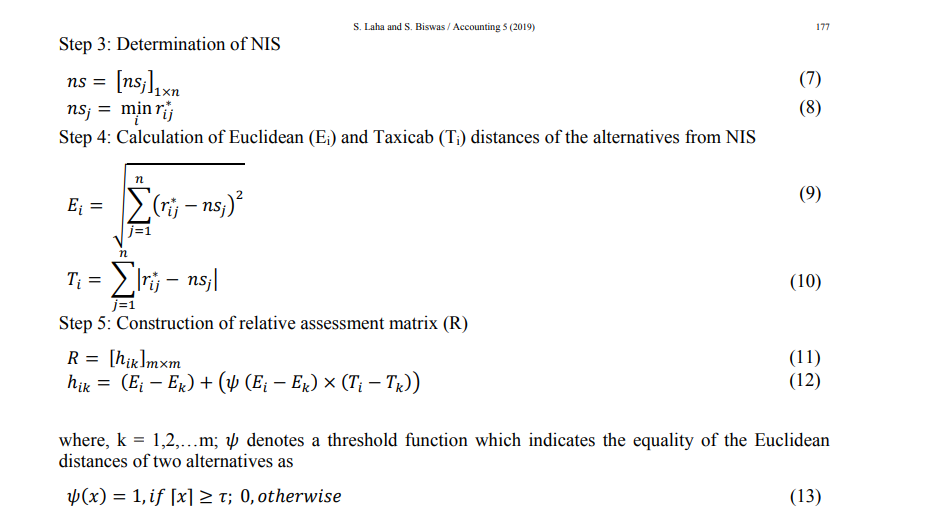

In [122]:
data2023

RGDP ($US)  GDP per capita ($US - Adjusted to PPP)  \
Australia    1.723827e+12                             69114.73789   
Belgium      6.322166e+11                             70455.95840   
Canada       2.140086e+12                             61582.34997   
China        1.779478e+13                             24557.63900   
Denmark      4.041988e+11                             76687.90284   
England      3.340032e+12                             58906.23886   
Finland      3.001872e+11                             65060.67420   
France       3.030904e+12                             61156.77282   
Germany      4.456081e+12                             69338.29323   
India        3.549919e+12                             10175.76797   
Italy        2.254851e+12                             58754.90788   
Japan        4.212945e+12                             50206.60920   
Korea        1.712793e+12                             54033.16000   
Netherlands  1.118125e+12                             62536.73200   
Russia       2.021421e+12                             44103.54690   
Spain        1.580695e+12                             52779.23406   
Sweden       5.932677e+11                             70206.61164   
Switzerland  8.849404e+11                             92980.40190   
US           2.736094e+13                             81695.18710   

             Unemployment rate (% tot labor force)  Inflation rate  \
Australia                                    3.667        5.720000   
Belgium                                      5.508        4.049011   
Canada                                       5.366        3.880000   
China                                        4.670        0.234837   
Denmark                                      5.142        3.300000   
England                                      4.055        6.793967   
Finland                                      7.155        6.250643   
France                                       7.323        1.071832   
Germany                                      3.045        5.900000   
India                                        4.172        4.380000   
Italy                                        7.618        5.600000   
Japan                                        2.575        3.268134   
Korea                                        2.642        3.592814   
Netherlands                                  3.561        3.838394   
Russia                                       3.325      -16.198783   
Spain                                       12.144        3.400000   
Sweden                                       7.587        8.500000   
Switzerland                                  4.050        2.135401   
US                                           3.625        4.116338   

             Govt debt-to-gdp ratio  Current BoP   \
Australia                 72.473184  2.138379e+10   
Belgium                  101.070662 -6.205460e+09   
Canada                    51.787349 -1.325465e+10   
China                     79.050000  2.529873e+11   
Denmark                   29.300000  4.419531e+10   
England                  201.256349 -1.103932e+11   
Finland                   75.800000 -4.364136e+09   
France                   132.667817 -2.279159e+10   
Germany                   63.600000  2.627230e+11   
India                     61.170425 -3.233634e+10   
Italy                    137.300000  1.155165e+10   
Japan                    250.737608  1.506906e+11   
Korea                     51.530000  3.548820e+10   
Netherlands               53.942076  1.010187e+10   
Russia                    14.900000  5.022444e+10   
Spain                    107.700000  4.109357e+10   
Sweden                    45.665664  4.007286e+10   
Switzerland               14.088715  6.782124e+10   
US                       123.000000 -8.188220e+11   

             Labor force participation rate      Trade  RGDP % Change  
Australia                            66.371   1.641740       1.823471  
Belgium                     

In [123]:
score2023,weight = tính_mọi_thứ_codas(data2023,benefit_vector)

In [124]:
weight

array([0.30586104, 0.03411429, 0.13293855, 0.02048112, 0.11152165,
       0.02073016, 0.03736278, 0.30586104, 0.03112935])

In [125]:
score2023

score       nation
18  12.505262           US
3    7.366324        China
8    0.276680      Germany
14  -0.530604       Russia
9   -0.617129        India
17  -0.768636  Switzerland
12  -0.838746        Korea
11  -0.921982        Japan
13  -0.980239  Netherlands
0   -1.157093    Australia
4   -1.229176      Denmark
2   -1.231541       Canada
5   -1.308261      England
7   -1.475592       France
16  -1.561467       Sweden
1   -1.669379      Belgium
6   -1.828069      Finland
10  -1.831214        Italy
15  -2.199139        Spain

#### 6 năm

In [126]:
score_de_2017_à_2023_codas ={}

for i in range(2017,2024):
    data = yearly_dfs[i].drop('Year',axis = 1)
    score,weight = tính_mọi_thứ_codas(data,benefit_vector)
    score_de_2017_à_2023_codas[i] = score

In [127]:
for year,i in score_de_2017_à_2023_codas.items():
    print(year)
    display(i)

2017


score       nation
18  10.484050           US
3    6.311879        China
11   0.732988        Japan
8    0.543123      Germany
14  -0.324421       Russia
12  -0.680216        Korea
9   -0.760772        India
17  -0.784185  Switzerland
2   -1.074598       Canada
0   -1.077646    Australia
13  -1.113068  Netherlands
4   -1.126100      Denmark
7   -1.160821       France
5   -1.213710      England
16  -1.364978       Sweden
6   -1.457869      Finland
10  -1.680850        Italy
1   -1.807705      Belgium
15  -2.445101        Spain

2018


score       nation
18  10.359794           US
3    6.766334        China
11   0.579029        Japan
8    0.554885      Germany
12  -0.812212        Korea
17  -0.868147  Switzerland
14  -0.921047       Russia
4   -0.947762      Denmark
13  -1.034746  Netherlands
5   -1.167249      England
0   -1.173896    Australia
7   -1.229349       France
2   -1.236427       Canada
9   -1.291481        India
6   -1.347576      Finland
16  -1.350527       Sweden
10  -1.444575        Italy
1   -1.493372      Belgium
15  -1.941675        Spain

2019


score       nation
18  10.677905           US
3    6.184260        China
11   1.177806        Japan
8   -0.038093      Germany
9   -0.199175        India
17  -0.628504  Switzerland
12  -0.943104        Korea
14  -1.032897       Russia
2   -1.049002       Canada
4   -1.128816      Denmark
5   -1.135270      England
7   -1.224226       France
13  -1.378428  Netherlands
0   -1.400656    Australia
10  -1.491606        Italy
6   -1.494822      Finland
1   -1.577562      Belgium
15  -1.626756        Spain
16  -1.691052       Sweden

2020


score       nation
18  10.556172           US
3    6.674034        China
11   0.883885        Japan
8    0.256818      Germany
17  -0.175024  Switzerland
12  -0.760198        Korea
4   -0.888138      Denmark
7   -0.900029       France
10  -0.961625        Italy
16  -0.965317       Sweden
6   -1.028189      Finland
15  -1.157133        Spain
5   -1.190285      England
13  -1.202638  Netherlands
0   -1.217258    Australia
2   -1.265058       Canada
1   -1.386849      Belgium
14  -2.269298       Russia
9   -3.003871        India

2021


score       nation
18  11.122211           US
3    8.641968        China
8    0.121604      Germany
11   0.075607        Japan
17  -0.900051  Switzerland
14  -0.919656       Russia
12  -0.957649        Korea
9   -0.965739        India
4   -1.134979      Denmark
13  -1.208731  Netherlands
5   -1.220866      England
7   -1.224081       France
0   -1.236653    Australia
2   -1.357215       Canada
16  -1.380777       Sweden
6   -1.588627      Finland
1   -1.622601      Belgium
10  -1.688322        Italy
15  -2.555442        Spain

2022


score       nation
18   5.924153           US
3    4.314288        China
8    0.332509      Germany
17   0.323761  Switzerland
11   0.319614        Japan
9    0.296846        India
0    0.277610    Australia
12   0.266874        Korea
2    0.263513       Canada
7    0.224885       France
5    0.214636      England
4    0.189189      Denmark
13   0.153217  Netherlands
6    0.124513      Finland
16   0.120531       Sweden
10   0.109310        Italy
1    0.091867      Belgium
15   0.056847        Spain
14 -13.604162       Russia

2023


score       nation
18  12.505262           US
3    7.366324        China
8    0.276680      Germany
14  -0.530604       Russia
9   -0.617129        India
17  -0.768636  Switzerland
12  -0.838746        Korea
11  -0.921982        Japan
13  -0.980239  Netherlands
0   -1.157093    Australia
4   -1.229176      Denmark
2   -1.231541       Canada
5   -1.308261      England
7   -1.475592       France
16  -1.561467       Sweden
1   -1.669379      Belgium
6   -1.828069      Finland
10  -1.831214        Italy
15  -2.199139        Spain

In [128]:
# weight2023 = weights.entropy_weights(data2023_scaled)

In [129]:

# type_var = [1,1,-1,-1,-1,1,1,1,1,1,1]
# result2023 = method(data2023_scaled,weight2023,type_var)

In [130]:
# result2023_reshaped = result2023.reshape(-1, 1)
# scaler = MinMaxScaler()
# result2023_reshaped = scaler.fit_transform(result2023_reshaped)

### TOPSIS

In [131]:
# from skcriteria.agg import similarity  # here lives TOPSIS
from skcriteria.preprocessing.weighters import entropy_weights
from pymcdm.methods import TOPSIS
import pymcdm.methods as mcdm_methods
from pymcdm.weights import *
import  pymcdm.normalizations as mcdm_norm

In [132]:
def tính_mọi_thứ_topsis(df_of_year,benefit_vector):
    scaler = MinMaxScaler((0.001,2))
    
    df_of_year_scaled  = scaler.fit_transform(df_of_year)
#----------------------------------------------------------------

    def vec_nor(x,cost  ):

        if cost:
            return 1 - (x / np.sqrt(np.sum(x ** 2)))
        return x / np.sqrt(np.sum(x ** 2))
#----------------------------------------------------------------

    def nor_dataframe(df):
        cost = [False, False, True, True, True, False, False, False, False, False, False]
        df_nor = pd.DataFrame()
        for index,i in enumerate(df.columns):
                df_nor[i] =  vec_nor(df[i],cost = cost[index])
                
        return df_nor
 #----------------------------------------------------------------   
    def topsis(nmatrix, weights):
        # Every row of nmatrix is multiplayed by weights
        weighted_matrix = nmatrix * weights

        # Vectors of PIS and NIS
        pis = np.max(weighted_matrix, axis=0)
        nis = np.min(weighted_matrix, axis=0)

        # PIS and NIS are substracted from every row of weighted matrix
        Dp = np.sqrt(np.sum((weighted_matrix - pis) ** 2, axis=1))
        Dm = np.sqrt(np.sum((weighted_matrix - nis) ** 2, axis=1))

        return Dm / (Dm + Dp)
    

    nor_data = nor_dataframe(df_of_year)
    weights =entropy_weights(df_of_year_scaled)
    score = topsis(nor_data, weights)
    
    score = pd.DataFrame({'score':score,'nation':score.index})
    score = score.sort_values('score',ascending=False)
    return score,weights

In [133]:
score2023,weight_entropy = tính_mọi_thứ_topsis(data2023,benefit_vector= benefit_vector)

In [134]:
weight_entropy

array([0.30586104, 0.03411429, 0.13293855, 0.02048112, 0.11152165,
       0.02073016, 0.03736278, 0.30586104, 0.03112935])

In [135]:
score2023

score       nation
US           0.896838           US
China        0.649808        China
Germany      0.238358      Germany
India        0.207114        India
Russia       0.203665       Russia
Japan        0.202231        Japan
Korea        0.190448        Korea
Switzerland  0.189035  Switzerland
Netherlands  0.180775  Netherlands
Australia    0.176298    Australia
Canada       0.175703       Canada
England      0.173776      England
Denmark      0.169673      Denmark
France       0.159559       France
Sweden       0.150065       Sweden
Belgium      0.146120      Belgium
Finland      0.140976      Finland
Italy        0.140458        Italy
Spain        0.128042        Spain

#### 7 ans

In [136]:
score_de_2017_à_2023_topsis ={}

for i in range(2017,2024):
    data = yearly_dfs[i].drop('Year',axis = 1)
    score,weight = tính_mọi_thứ_topsis(data,benefit_vector)
    score_de_2017_à_2023_topsis[i] = score

In [137]:
for year,i in score_de_2017_à_2023_topsis.items():
    print(year)
    display(i)

2017


score       nation
US           0.849131           US
China        0.628493        China
Japan        0.293442        Japan
Germany      0.261134      Germany
Russia       0.223990       Russia
India        0.209853        India
Korea        0.205143        Korea
Switzerland  0.195389  Switzerland
England      0.188081      England
France       0.185009       France
Canada       0.184831       Canada
Australia    0.184010    Australia
Netherlands  0.180515  Netherlands
Denmark      0.178799      Denmark
Sweden       0.166767       Sweden
Finland      0.158374      Finland
Italy        0.151936        Italy
Belgium      0.143977      Belgium
Spain        0.120858        Spain

2018


score       nation
US           0.871456           US
China        0.672926        China
Japan        0.282897        Japan
Germany      0.261975      Germany
Korea        0.201463        Korea
Russia       0.195056       Russia
Switzerland  0.193200  Switzerland
England      0.189444      England
Denmark      0.185096      Denmark
Netherlands  0.184110  Netherlands
India        0.183925        India
France       0.179972       France
Australia    0.178086    Australia
Canada       0.175317       Canada
Sweden       0.163269       Sweden
Finland      0.160489      Finland
Italy        0.156275        Italy
Belgium      0.147497      Belgium
Spain        0.132064        Spain

2019


score       nation
US           0.881634           US
China        0.656271        China
Japan        0.322691        Japan
Germany      0.264156      Germany
India        0.261739        India
Switzerland  0.232347  Switzerland
Korea        0.226830        Korea
Russia       0.220040       Russia
Canada       0.215850       Canada
England      0.215472      England
France       0.208806       France
Denmark      0.203833      Denmark
Italy        0.193617        Italy
Australia    0.190749    Australia
Netherlands  0.190673  Netherlands
Spain        0.185960        Spain
Finland      0.184558      Finland
Belgium      0.180493      Belgium
Sweden       0.173110       Sweden

2020


score       nation
US           0.876781           US
China        0.678302        China
Japan        0.334695        Japan
Germany      0.309527      Germany
Switzerland  0.273924  Switzerland
France       0.257430       France
Korea        0.255690        Korea
Italy        0.253850        Italy
England      0.246492      England
Spain        0.243653        Spain
Denmark      0.242567      Denmark
Sweden       0.238847       Sweden
Finland      0.236338      Finland
Canada       0.235191       Canada
Australia    0.233673    Australia
Netherlands  0.229028  Netherlands
Belgium      0.224838      Belgium
Russia       0.188979       Russia
India        0.160829        India

2021


score       nation
US           0.882462           US
China        0.753642        China
Japan        0.248597        Japan
Germany      0.235964      Germany
India        0.190438        India
Russia       0.184922       Russia
Korea        0.181478        Korea
Switzerland  0.179652  Switzerland
England      0.173041      England
France       0.169668       France
Netherlands  0.166047  Netherlands
Denmark      0.166004      Denmark
Australia    0.163043    Australia
Canada       0.158708       Canada
Sweden       0.151868       Sweden
Finland      0.137944      Finland
Italy        0.135262        Italy
Belgium      0.133467      Belgium
Spain        0.104740        Spain

2022


score       nation
US           0.947828           US
China        0.870898        China
Germany      0.709938      Germany
Japan        0.708420        Japan
India        0.704032        India
England      0.698997      England
France       0.696756       France
Canada       0.693160       Canada
Australia    0.689507    Australia
Korea        0.688281        Korea
Italy        0.688150        Italy
Switzerland  0.683137  Switzerland
Spain        0.680934        Spain
Netherlands  0.680655  Netherlands
Denmark      0.676745      Denmark
Sweden       0.676385       Sweden
Belgium      0.676185      Belgium
Finland      0.674618      Finland
Russia       0.110499       Russia

2023


score       nation
US           0.896838           US
China        0.649808        China
Germany      0.238358      Germany
India        0.207114        India
Russia       0.203665       Russia
Japan        0.202231        Japan
Korea        0.190448        Korea
Switzerland  0.189035  Switzerland
Netherlands  0.180775  Netherlands
Australia    0.176298    Australia
Canada       0.175703       Canada
England      0.173776      England
Denmark      0.169673      Denmark
France       0.159559       France
Sweden       0.150065       Sweden
Belgium      0.146120      Belgium
Finland      0.140976      Finland
Italy        0.140458        Italy
Spain        0.128042        Spain

In [138]:
# weights2023 =entropy_weights(data2023_scaled,benefit_vector)
# weights2023

array([0.10203273, 0.08747392, 0.08779847, 0.07360197, 0.10112651,
       0.09222036, 0.09788683, 0.09199936, 0.08474657, 0.10203273,
       0.07908054])  critic weight no scaling

array([0.10203273, 0.08747392, 0.08779847, 0.07360197, 0.10112651,
       0.09222036, 0.09788683, 0.09199936, 0.08474657, 0.10203273,
       0.07908054]) critic weight with scaling

array([0.03391554, 0.07596772, 0.0899565 , 0.03432824, 0.02935885,
       0.02304302, 0.57014224, 0.03955876, 0.02205911, 0.03391554,
       0.04775448])   cilos weight no scaling

array([0.081906  , 0.07353663, 0.05354567, 0.06032797, 0.04515409,
       0.13127788, 0.15714382, 0.07954226, 0.11034343, 0.081906  ,
       0.12531624])  cilos weight with scaling


array([0.23726809, 0.04466179, 0.09848138, 0.02874699, 0.10872764,
       0.02922414, 0.03595045, 0.11336159, 0.03047804, 0.23726809,
       0.03583179])  entropy

## Using clustering to verify indicator integrity

    It shall be known that I deeply regret creating lists to store these variables instead of using a for loop. I was not thinking.

In [139]:
weight_entropy

array([0.30586104, 0.03411429, 0.13293855, 0.02048112, 0.11152165,
       0.02073016, 0.03736278, 0.30586104, 0.03112935])

In [140]:
countries = ['australia', 'belgium', 'canada', 'china','denmark', 'england', 'finland', 'france', 
             'germany', 'india', 'italy', 'japan', 'korea', 'netherlands', 'russia','spain', 'sweden', 'switzerland', 'us']

In [141]:
directory = 'imputed_data'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in csv_files:
    data = pd.read_csv(os.path.join(directory, file)).tail(7)
    file_name = os.path.splitext(file)[0] + "_7rs"

    globals()[file_name] = data

In [142]:
last_seven_years_data = [Australia_7rs, Belgium_7rs, Canada_7rs, China_7rs,Denmark_7rs, England_7rs, Finland_7rs, France_7rs, Germany_7rs, India_7rs,
                        Italy_7rs, Japan_7rs, Korea_7rs, Netherlands_7rs, Russia_7rs,Spain_7rs, Sweden_7rs, Switzerland_7rs, US_7rs]

In [143]:
for df in last_seven_years_data:
    df.drop(df.columns[0], axis=1, inplace=True) # bỏ cột năm

In [144]:
for idx, df in enumerate(last_seven_years_data):
    last_seven_years_data[idx] = df # * weight_entropy

In [145]:
last_seven_years_data[0] # belgium sau khi nhân weight

1            2      3     4          5             6       7  \
26  1.326882e+12  48418.55842  5.592  1.95  53.264222 -3.609444e+10  65.180   
27  1.429734e+12  50251.33534  5.300  1.91  54.429697 -3.188871e+10  65.640   
28  1.394671e+12  52746.71829  5.159  1.61  60.141987  4.876230e+09  65.950   
29  1.330382e+12  54064.07947  6.456  0.85  69.219056  3.118903e+10  65.030   
30  1.559034e+12  57406.17876  5.116  2.86  69.907717  4.909176e+10  65.850   
31  1.692957e+12  65365.94851  3.701  6.59  57.974748  1.774082e+10  66.147   
32  1.723827e+12  69114.73789  3.667  5.72  72.473184  2.138379e+10  66.371   

               8         9         10  
26  6.818632e+09  1.628394   9.879355  
27  1.568182e+10  1.652056   7.751372  
28  4.646961e+10  1.588873  -2.452369  
29  4.903825e+10  1.560150  -4.609673  
30  8.960865e+10  1.604717  17.186965  
31  9.719983e+10  1.678196   8.590121  
32  8.393506e+10  1.641740   1.823471

### SVD

[Australia_7rs, Belgium_7rs, Canada_7rs, China_7rs,Denmark_7rs, England_7rs, Finland_7rs, France_7rs, Germany_7rs, India_7rs,
                        Italy_7rs, Japan_7rs, Korea_7rs, Netherlands_7rs, Russia_7rs,Spain_7rs, Sweden_7rs, Switzerland_7rs, US_7rs]

In [146]:
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# scaler = StandardScaler()
# _7rs_scaled = scaler.fit_transform(US_7rs)

svd = TruncatedSVD(n_components=3)
svd_result = svd.fit_transform(US_7rs)
svd_df = pd.DataFrame(data=svd_result, columns=['PC1', 'PC2', 'PC3'])

svd_df = svd_df.reset_index(drop=True)

In [147]:
a = svd.explained_variance_ratio_

In [148]:
b = np.cumsum(a)
print(b)

[0.99524621 0.99985424 1.        ]


In [149]:
# fixing
for idx, df in enumerate(last_seven_years_data):
    country_name = countries[idx]
    svd = TruncatedSVD(n_components=1)
            # PCA(n_components=1)
    # pca = TSNE(n_components=1, perplexity= 1)
    svd_result = svd.fit_transform(last_seven_years_data[idx])
    locals()[f'pca_{country_name}'] = pd.DataFrame(data=svd_result, columns=['PC1'])
    
    # last_seven_years_pca.append(pd.DataFrame(data=pca_result, columns=['PC1']))

In [150]:
pca_australia #australia sau khi nhân weight + pca

PC1
0  1.325903e+12
1  1.429045e+12
2  1.395429e+12
3  1.331451e+12
4  1.561608e+12
5  1.695526e+12
6  1.725883e+12

In [151]:
# pretend pca here is instead svd
pca_dfs = [pca_australia, pca_belgium, pca_canada, pca_china, pca_denmark, pca_england, pca_finland, pca_france, pca_germany, pca_india,
           pca_italy, pca_japan, pca_korea, pca_netherlands, pca_russia, pca_spain, pca_sweden, pca_switzerland, pca_us]

In [152]:
transposed_dfs = []

for df in pca_dfs:
    df_T = df.T
    country_name_parts = df.columns[0].split('_')
    
    if len(country_name_parts) > 1:
        country_name = country_name_parts[1].upper()  # Extract the country name from the DataFrame column name
    else:
        country_name = 'UNKNOWN'
    
    new_variable_name = f'{df.columns[0]}_T'
    locals()[new_variable_name] = df_T 
    transposed_dfs.append(df_T)

In [153]:
for idx, df in enumerate(transposed_dfs):
    country_name = countries[idx]
    locals()[f'pca_{country_name}_T'] = df

In [154]:
transposed_dfs_named =[ pca_australia_T, pca_belgium_T, pca_canada_T, pca_china_T, pca_denmark_T, pca_england_T, pca_finland_T, pca_france_T, pca_germany_T, pca_india_T,
                       pca_italy_T, pca_japan_T, pca_korea_T, pca_netherlands_T, pca_russia_T,pca_spain_T, pca_sweden_T, pca_switzerland_T, pca_us_T]

columns = transposed_dfs[0].columns

appended_df = pd.concat(transposed_dfs, axis=0)
# appended_df.reset_index(drop=True, inplace=True)

In [155]:
scaled_appended_df = StandardScaler().fit_transform(appended_df)

In [156]:
scaled_appended_df = pd.DataFrame(scaled_appended_df)

In [157]:
scaled_appended_df.columns = ['2017', '2018', '2019', '2020', '2021', '2022', '2023'] 
scaled_appended_df.index = countries
scaled_appended_df

2017      2018      2019      2020      2021      2022  \
australia   -0.404250 -0.401096 -0.402646 -0.404943 -0.396973 -0.364914   
belgium     -0.580145 -0.577488 -0.567150 -0.558394 -0.557863 -0.539966   
canada      -0.334998 -0.341969 -0.335903 -0.343063 -0.322344 -0.291588   
china        1.943736  2.080904  2.063105  2.140946  2.327470  2.185365   
denmark     -0.616208 -0.614333 -0.602956 -0.590677 -0.590132 -0.567984   
england     -0.114475 -0.113413 -0.123752 -0.144473 -0.132546 -0.145184   
finland     -0.632951 -0.630767 -0.618318 -0.606820 -0.608853 -0.587453   
france      -0.133001 -0.129826 -0.147474 -0.154102 -0.162871 -0.194107   
germany      0.105306  0.109716  0.078302  0.084823  0.061005  0.011183   
india       -0.120723 -0.146919 -0.126813 -0.149248 -0.127897 -0.103409   
italy       -0.268064 -0.268838 -0.284431 -0.296708 -0.297434 -0.306760   
japan        0.366887  0.318782  0.310356  0.304993  0.185302  0.038482   
korea       -0.340051 -0.341417 -0.353286 -0.344779 -0.353424 -0.368428   
netherlands -0.508357 -0.502637 -0.494677 -0.484400 -0.484961 -0.472003   
russia      -0.351009 -0.353281 -0.344542 -0.373981 -0.347763 -0.270981   
spain       -0.406697 -0.402406 -0.402690 -0.415097 -0.416411 -0.408650   
sweden      -0.571926 -0.575058 -0.567287 -0.554106 -0.550996 -0.538730   
switzerland -0.538335 -0.540323 -0.530992 -0.517349 -0.520999 -0.501388   
us           3.505259  3.430369  3.451154  3.407379  3.297692  3.426514   

                 2023  
australia   -0.368830  
belgium     -0.534034  
canada      -0.306263  
china        2.059357  
denmark     -0.567849  
england     -0.124696  
finland     -0.584184  
france      -0.171631  
germany      0.045208  
india       -0.093124  
italy       -0.288909  
japan        0.007310  
korea       -0.370867  
netherlands -0.459591  
russia      -0.324196  
spain       -0.390520  
sweden      -0.539631  
switzerland -0.494531  
us           3.506982

In [158]:
appended_df.columns = ['2017', '2018', '2019', '2020', '2021', '2022', '2023'] 
appended_df.index = countries
appended_df /= 10**11

### Kmeans

In [159]:
from sklearn.cluster import KMeans

In [160]:
k_values = np.linspace(2, 15).astype(int)

results = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, init='random', max_iter=100, random_state=42)
    kmeans.fit(scaled_appended_df)
    
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    inertia = kmeans.inertia_
    
    results.append({
        'k': k,
        'cluster_labels': cluster_labels,
        'cluster_centers': cluster_centers,
        'inertia': inertia
    })

In [161]:
def calculate_dunn_index(data, cluster_labels):
    cluster_distances = []
    for cluster_id in set(cluster_labels):
        cluster_points = data[cluster_labels == cluster_id]
        pairwise_dist = pdist(cluster_points)
        cluster_distances.append(pairwise_dist)
    
    inter_cluster_distances = squareform(pdist(data))
    min_inter_cluster_distance = min(inter_cluster_distances[cluster_labels == i][:, cluster_labels == j].min() 
                                     for i in set(cluster_labels) for j in set(cluster_labels) if i != j)
    
    max_intra_cluster_distance = max(max(cluster_distances[i]) if cluster_distances[i].size > 0 else 0
                                     for i in range(len(cluster_distances)))
    
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index

In [162]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import rand_score
from scipy.spatial.distance import cdist, pdist, squareform

* Silhouette Score: Look for a higher score. Values close to +1 indicate well-clustered data.
* Dunn Index: Look for a higher value. A larger value indicates better clustering.
* Calinski-Harabasz Index: Look for a higher value. Higher values indicate denser and well-separated clusters.
* Inertia (within-cluster sum of squares): Look for a lower value. Lower inertia values indicate tighter clusters.
* Davies-Bouldin Index: Look for a lower value. A value closer to 0 indicates better clustering.

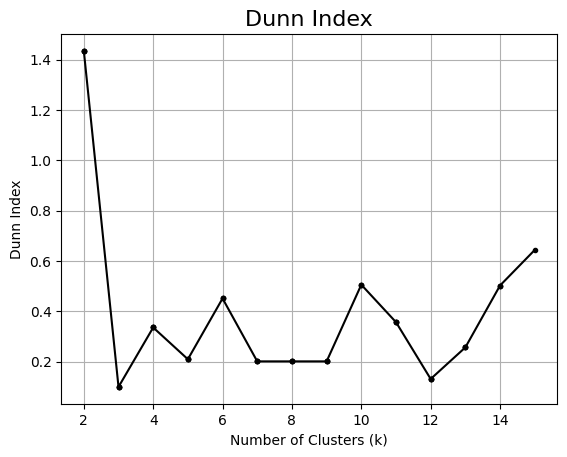

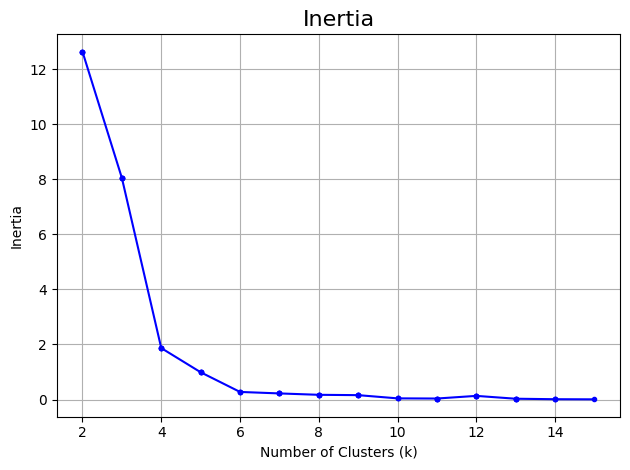

In [163]:
k_values = []
inertia_vals = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_indices = []

for result in results:
    k = result['k']
    cluster_labels = result['cluster_labels']
    cluster_centers = result['cluster_centers']
    inertia = result['inertia']
    silhouette = silhouette_score(scaled_appended_df, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(scaled_appended_df, cluster_labels)
    davies_bouldin = davies_bouldin_score(scaled_appended_df, cluster_labels)
    dunn_index = calculate_dunn_index(scaled_appended_df, cluster_labels)

    k_values.append(k)
    inertia_vals.append(inertia)
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)
    dunn_indices.append(dunn_index)

# # Silhouette
# plt.figure()
# plt.plot(k_values, silhouette_scores, marker='.', color='green')
# plt.grid()
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score', fontsize = 16)

# # Calinski-Harabasz
# plt.figure()
# plt.plot(k_values, calinski_harabasz_scores, marker='.')
# plt.grid()
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Calinski-Harabasz Score')
# plt.title('Calinski-Harabasz Score', fontsize = 16)

# # Davies-Bouldin 
# plt.figure()
# plt.plot(k_values, davies_bouldin_scores, marker='.', color='red')
# plt.grid()
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Davies-Bouldin Score')
# plt.title('Davies-Bouldin Score', fontsize = 16)

# Dunn Index
plt.figure()
plt.plot(k_values, dunn_indices, marker='.', color='black')
plt.grid()
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index', fontsize = 16)

# Inertia
plt.figure()
plt.plot(k_values, inertia_vals, marker='.', color='blue')
plt.grid()
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia', fontsize = 16)

plt.tight_layout()
plt.show()

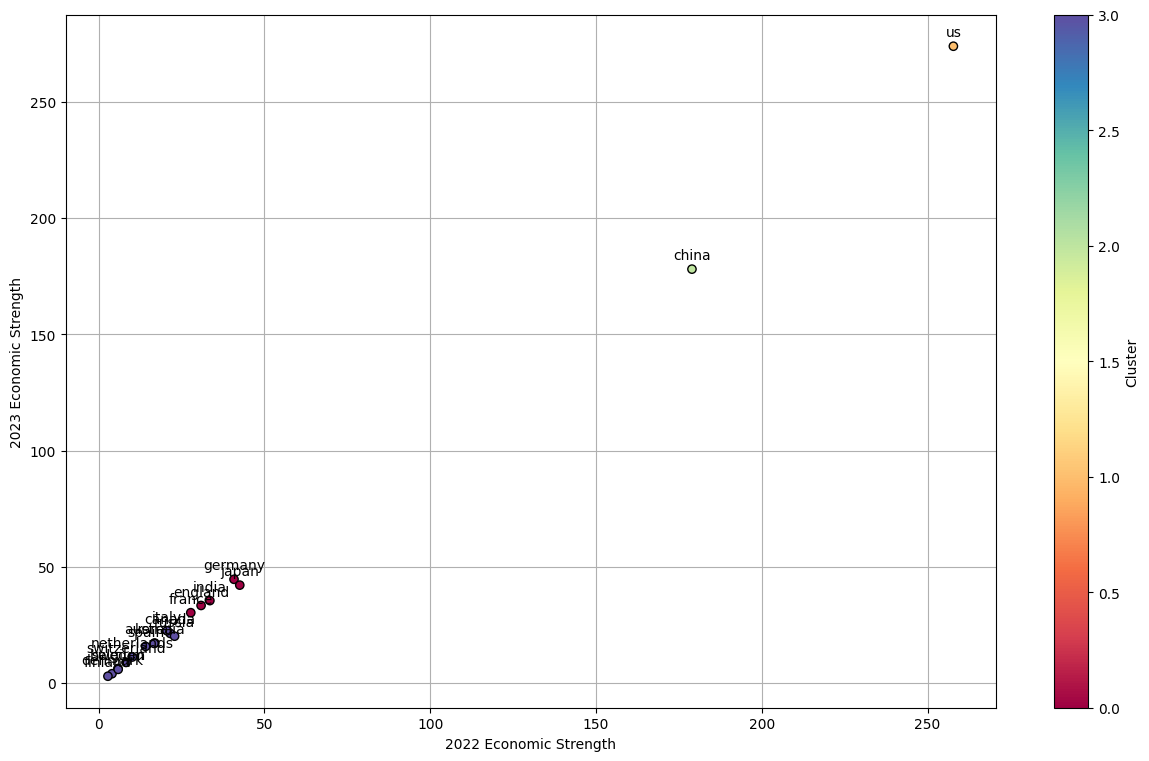

In [164]:
target_df = appended_df

kmeans = KMeans(n_clusters= 4, random_state=1)

kmeans.fit(target_df)

cluster_labels = kmeans.labels_

target_df['Cluster'] = cluster_labels

plt.figure(figsize=(15, 9))
plt.scatter(target_df['2022'],
            target_df['2023'], c = cluster_labels, cmap='Spectral', edgecolor='k')
# plt.title('K-means Clustering of Countries')
plt.xlabel('2022 Economic Strength')
plt.ylabel('2023 Economic Strength')
plt.colorbar(label='Cluster')
plt.grid()

for i, txt in enumerate(target_df.index):
    plt.annotate(txt, (target_df['2022'].iloc[i], 
                       target_df['2023'].iloc[i]),
                 textcoords="offset points", xytext=(0,7), ha='center')
# plt.legend(loc='upper left')
plt.show()

In [165]:
target_df['Cluster']

australia      3
belgium        3
canada         3
china          2
denmark        3
england        0
finland        3
france         0
germany        0
india          0
italy          3
japan          0
korea          3
netherlands    3
russia         3
spain          3
sweden         3
switzerland    3
us             1
Name: Cluster, dtype: int32

In [166]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
target_df = target_df.drop('Cluster', axis = 1)

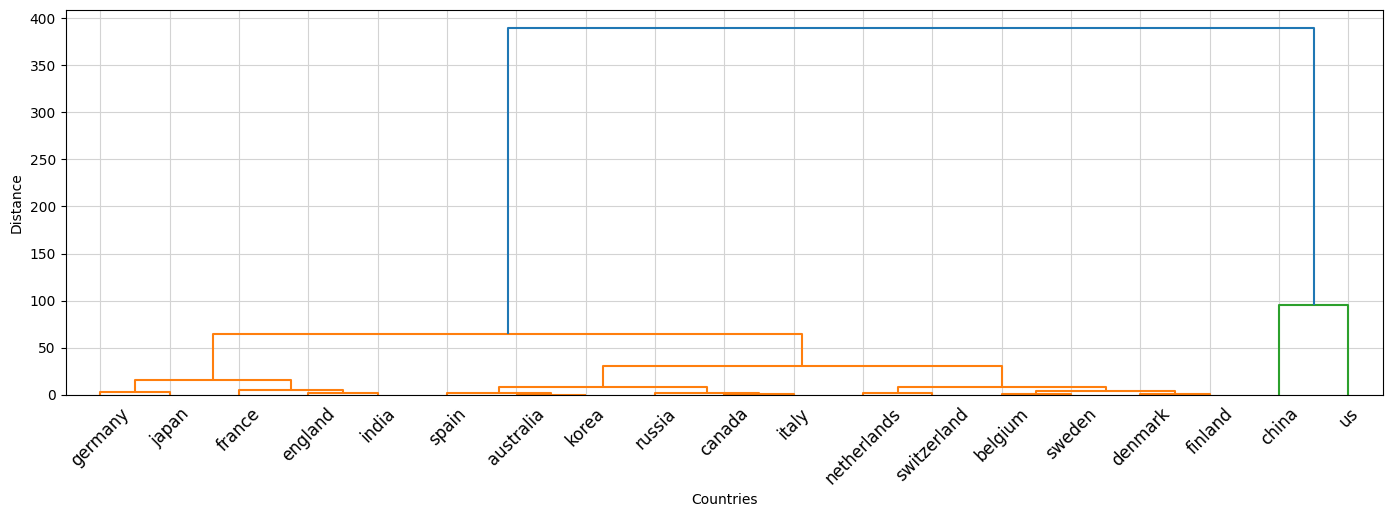

In [167]:
linkage_matrix = linkage(target_df[['2023']], method='ward')

plt.figure(figsize=(17, 5))
dendrogram(linkage_matrix, labels=target_df.index, orientation='top')
# plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.xticks(rotation = 45)
plt.ylabel('Distance')
plt.grid(color = 'lightgray')

plt.show()

In this context, the ordering of countries is not conducive to their hierarchical ranking. It is moreso the case that the items are being grouped based on their similarity or dissimilarity. Seen so, hierarchical clustering groups countries into broad clusters that correspond with their distance from the central distribution.

Nations' scores 2023 (obtained via topsis)

* .896838	US
* .649808	China
* .238358	Germany
* .207114	India
* .203665	Russia
* .202231	Japan
* .190448	Korea
* .189035	Switzerland
* .180775	Netherlands
* .176298	Australia
* .175703	Canada
* .173776	England
* .169673	Denmark
* .159559	France
* .150065	Sweden
* .146120	Belgium
* .140976	Finland
* .140458	Italy
* .128042	Spain

<Figure size 600x400 with 0 Axes>

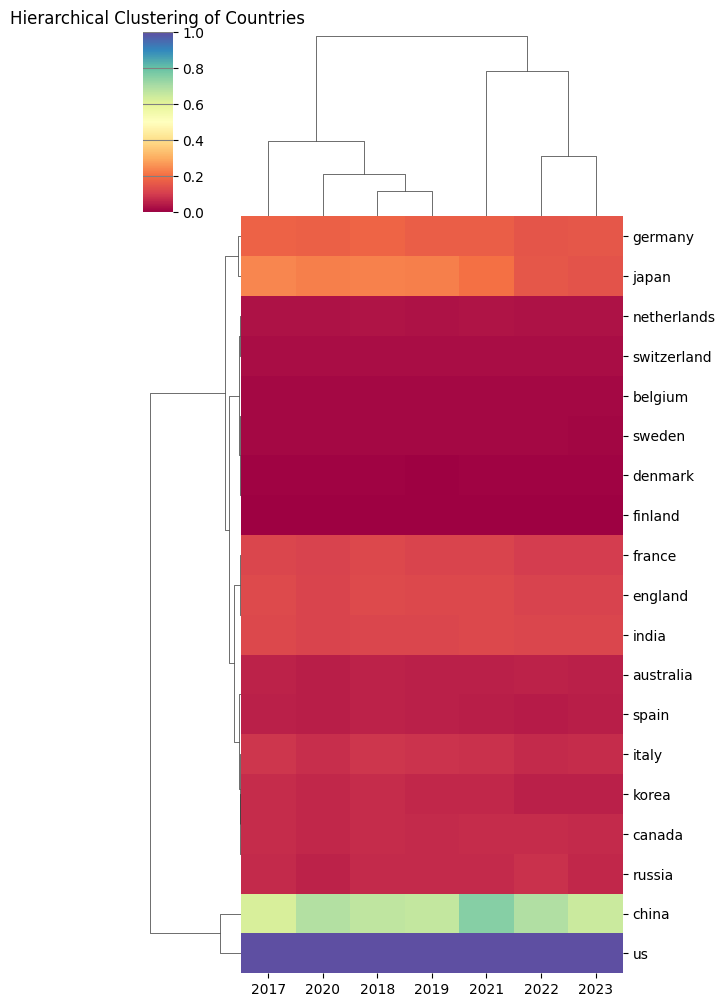

In [168]:
plt.figure(figsize=(6, 4))
sns.clustermap(target_df, method='ward', cmap='Spectral', standard_scale=1, figsize = (6,10))
plt.grid(color = 'gray')
plt.title('Hierarchical Clustering of Countries')
plt.show()

## Long term prospects

In [177]:
def prepare_data(data, window_size=4):
    X = []
    y = []
    for i in range(window_size,data.shape[0]):
        X.append(data.iloc[i-window_size:i])
        y.append(data.iloc[i])

    X = np.array(X)
    y = np.array(y)

    return X,y

In [180]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import mean_absolute_error,\
                            mean_squared_error,\
                            root_mean_squared_error,\
                            mean_absolute_percentage_error,\
                                r2_score

def forecast_a_mf(df,name):
# file_name = r'G:\PPRROOJJEECCTT\Imputed_data/Korea.csv'
# df = pd.read_csv(file_name)

# name   = file_name.split('/')[-1][:-4]


    svd = TruncatedSVD(n_components=1)
    svd_result = svd.fit_transform(df)
    svd_df = pd.DataFrame(data=svd_result, columns=['PC1'])

    svd_df = svd_df.reset_index(drop=True)


    standard_scaler = StandardScaler()
    svd_df['scaled_pc'] = standard_scaler.fit_transform(svd_df['PC1'].to_numpy().reshape(-1,1))

    print(f'For {name}')

    train_data, test_data = train_test_split(svd_df, shuffle=False, test_size=0.15)




    X_to_split,y_to_split = prepare_data(data=svd_df['scaled_pc'],window_size= 3)
    X_train = X_to_split[:26]
    X_test = X_to_split[26:]
    y_train = y_to_split[:26]


    print(X_test.shape)
    params_grid = {'alpha':list(range(1,100,10))}

    ridge_model = Ridge()
    grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=params_grid)
    grid_search_ridge.fit(X_train, y_train)

    ridge_y_pred = grid_search_ridge.predict(X_test)
    ridge_y_pred = standard_scaler.inverse_transform(ridge_y_pred.reshape(-1,1))    





    y_true = svd_df[-4:]['PC1'].values

    # report performance
    # mse = mean_squared_error(y_true, ridge_y_pred)
    # print('MSE: '+str(mse))
    # mae = mean_absolute_error(y_true, ridge_y_pred)
    # print('MAE: '+str(mae))
    rmse = root_mean_squared_error(y_true, ridge_y_pred)
    print('RMSE: '+str(rmse))
    mape = mean_absolute_percentage_error(y_true, ridge_y_pred)*100
    print('MAPE: '+str(mape)+'%')






    df_new = X_to_split.copy()

    y_forecast = []
    df_new  = np.insert(df_new,len(df_new),[df_new[-1,-2],df_new[-1,-1],y_to_split[-1]],axis =0)
    y_forecast.append(grid_search_ridge.predict(df_new[-1].reshape(1,3)))


    df_new  = np.insert(df_new,len(df_new),[y_to_split[-2],y_to_split[-1],y_forecast[-1][0]],axis =0)
    y_forecast.append(grid_search_ridge.predict(df_new[-1].reshape(1,3)))

    df_new  = np.insert(df_new,len(df_new),[y_to_split[-1],y_forecast[-2][0],y_forecast[-1][0]],axis =0)
    y_forecast.append(grid_search_ridge.predict(df_new[-1].reshape(1,3)))

    df_new  = np.insert(df_new,len(df_new),[y_forecast[-3][0],y_forecast[-2][0],y_forecast[-1][0]],axis =0)
    y_forecast.append(grid_search_ridge.predict(df_new[-1].reshape(1,3)))

    df_new  = np.insert(df_new,len(df_new),[y_forecast[-3][0],y_forecast[-2][0],y_forecast[-1][0]],axis =0)
    y_forecast.append(grid_search_ridge.predict(df_new[-1].reshape(1,3)))

    y_forecast = pd.Series(data =  y_forecast,index = [i for i in range(33,38)])


    plt.figure(figsize=(12,6))
    plt.xlabel('Dates')
    plt.ylabel('the stuff')
    plt.plot(train_data['scaled_pc'], 'green', label='Train data')
    plt.plot(test_data['scaled_pc'], label='Test data')
    plt.title(f'{name}')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_true)), y_true, color='b', label='True values')
    plt.plot(range(len(ridge_y_pred)), ridge_y_pred, color='r', label='Predicted values')
    plt.title(f'True vs. Predicted Values - {name}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()    

    plt.figure(figsize=(12,6))
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(svd_df['scaled_pc'], 'green', label='Original data')
    plt.plot(y_forecast, label='Prediction data for the next 5 years')
    plt.title(f'pred - {name}')
    plt.legend()
    plt.grid()
    plt.show()

    y_forecast = pd.concat([svd_df[-1:]['scaled_pc'],y_forecast],axis = 0)

    dev = []
    for i in range(1,len(y_forecast)):
        dev.append((y_forecast.values[i] / y_forecast.values[i - 1])  - 1 ) 

    dev = [float(i) for i in dev]


    def addlabels(x, y, labels):
   
        for i in range(len(x)):
            plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')


    plt.figure()
    sns.barplot(x = [i for i in range(2024,2029)],y = dev)
    addlabels([i for i in range(2024,2029)],dev,[f'{(i * 100):.3f}% ' for i in dev])
    plt.title('Growth compared to previous year')
    plt.show()
#_----------------------------------------------------------------------------------------------------------
    print('\n\n\n\n\n')

For AUSTRALIA
(4, 3)
RMSE: 136169287385.10382
MAPE: 8.022483857299191%


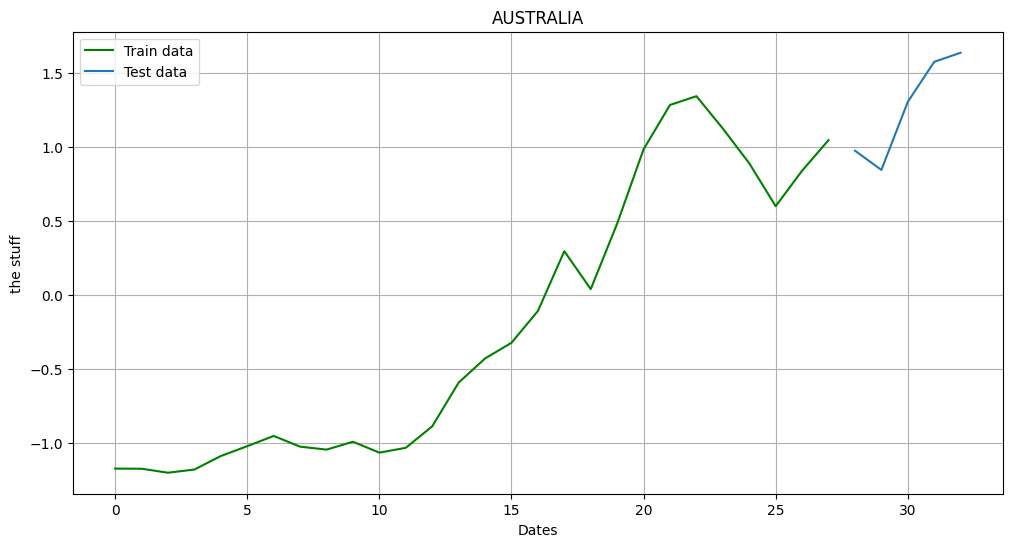

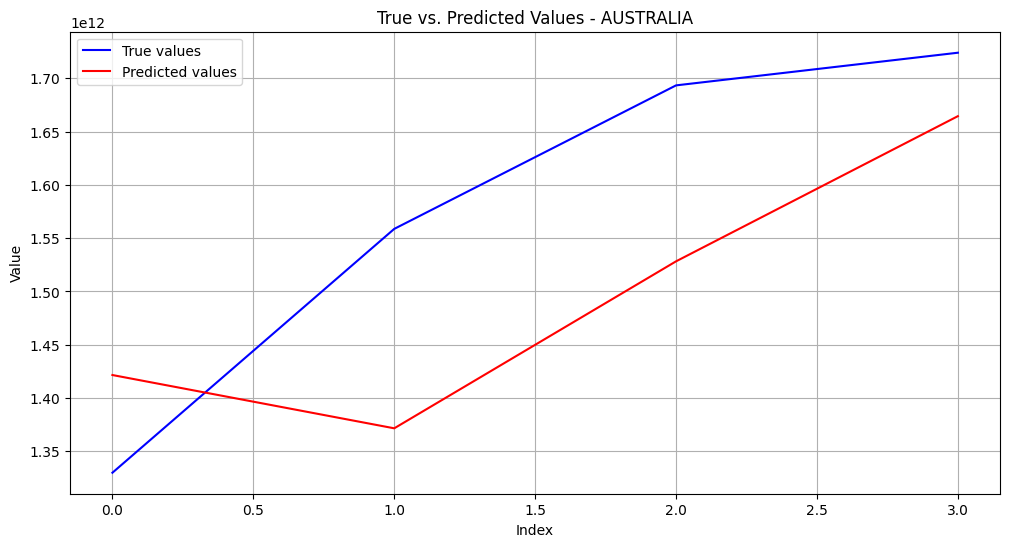

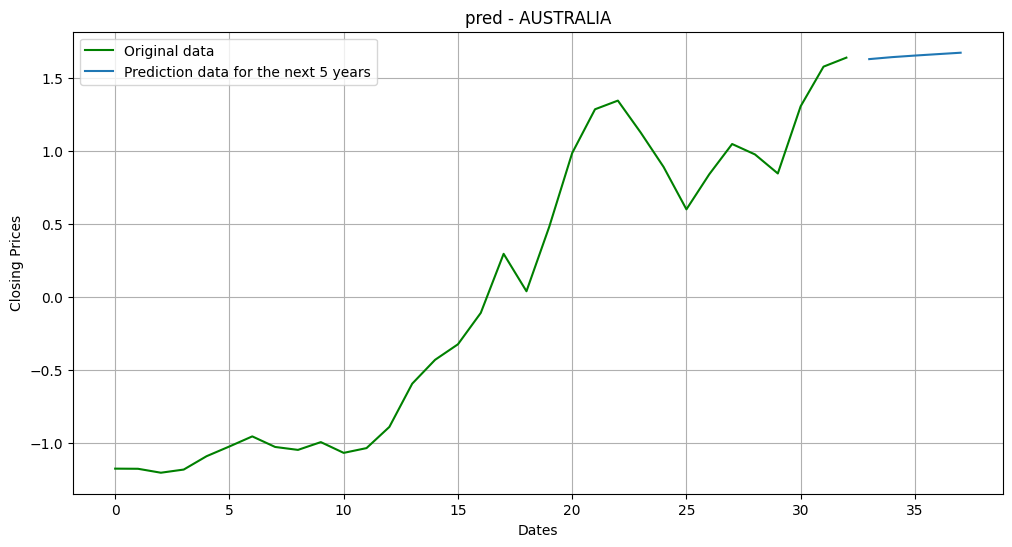

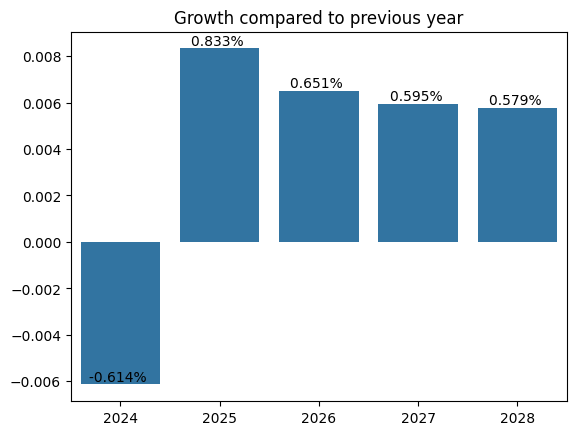







For BELGIUM
(4, 3)
RMSE: 41686395146.05019
MAPE: 5.429050295414844%


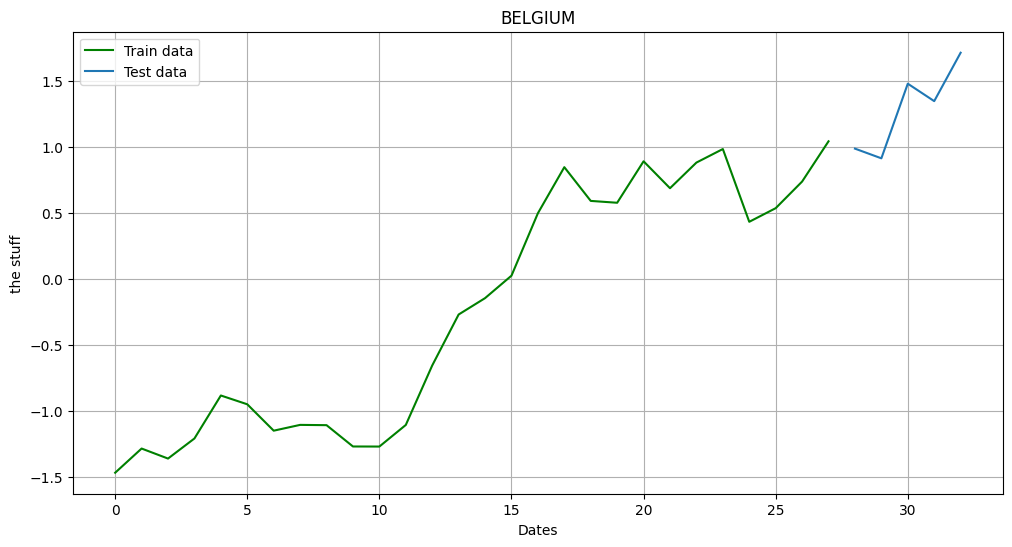

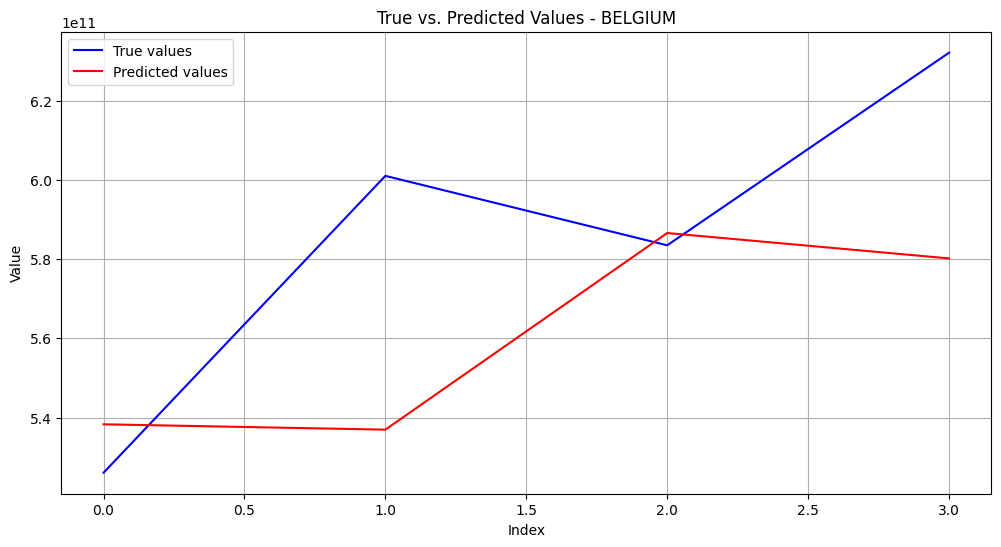

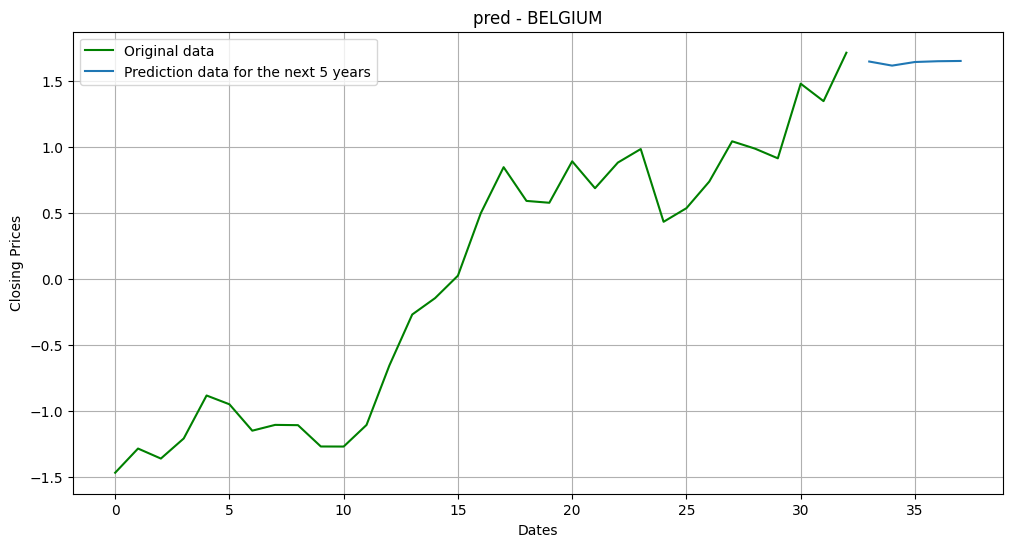

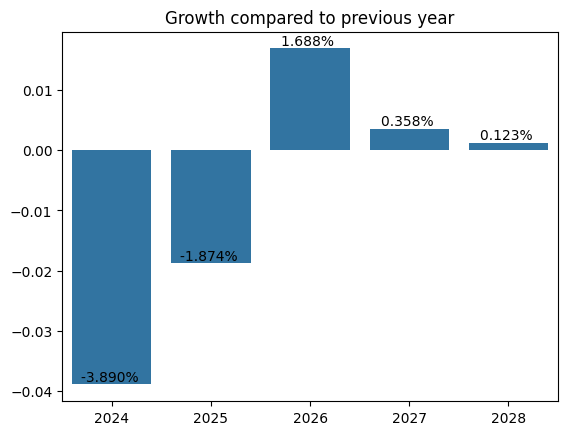







For CANADA
(4, 3)
RMSE: 194711132072.3194
MAPE: 8.395952431492235%


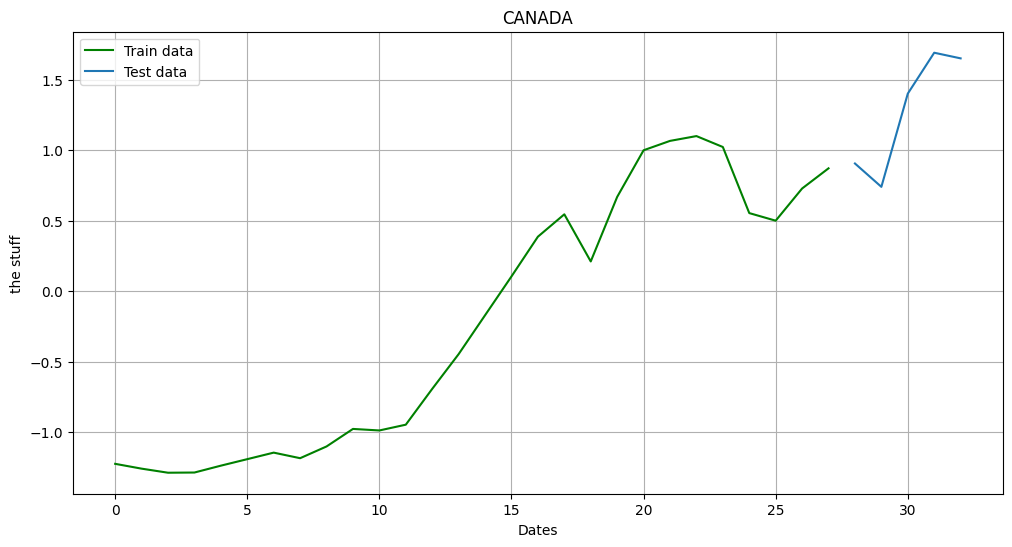

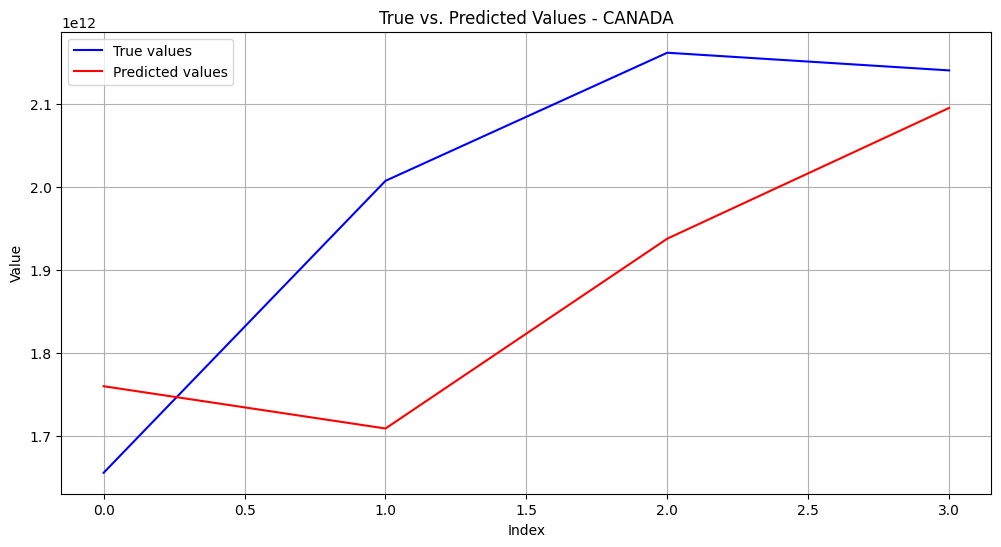

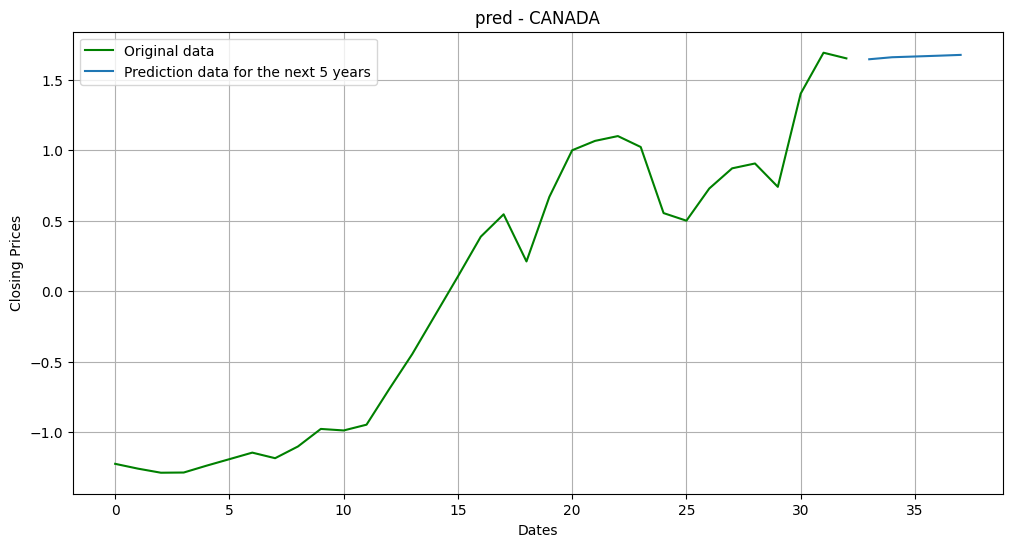

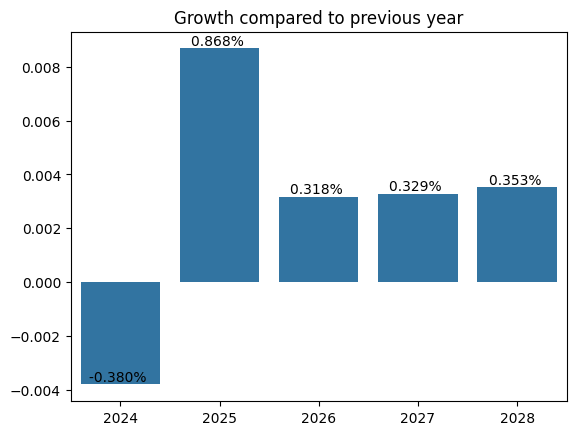







For CHINA
(4, 3)
RMSE: 1151777396664.5073
MAPE: 5.922212148191205%


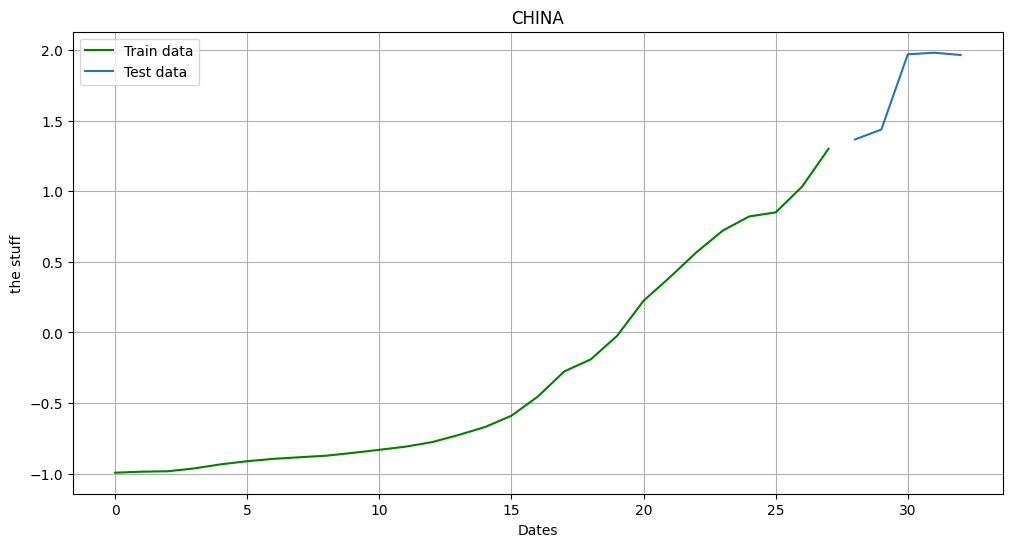

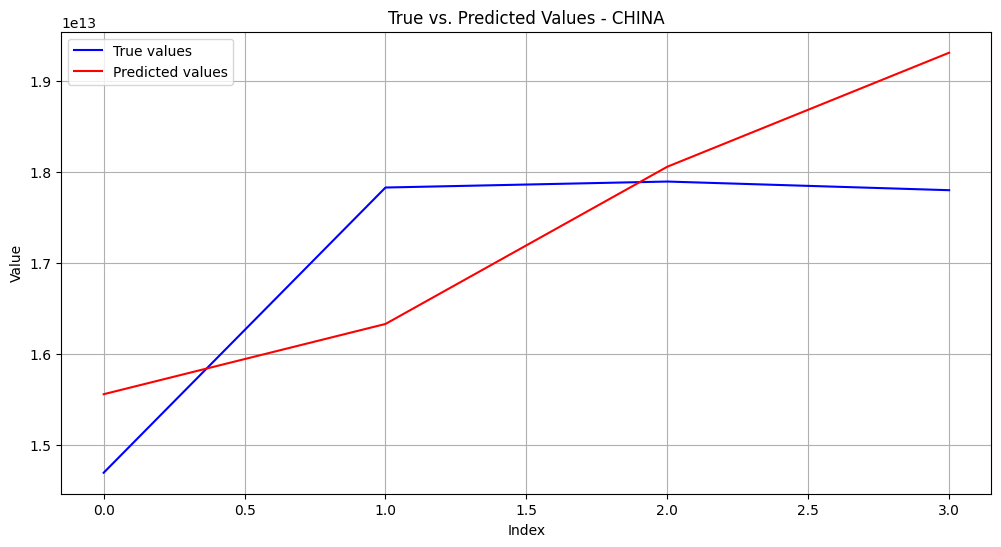

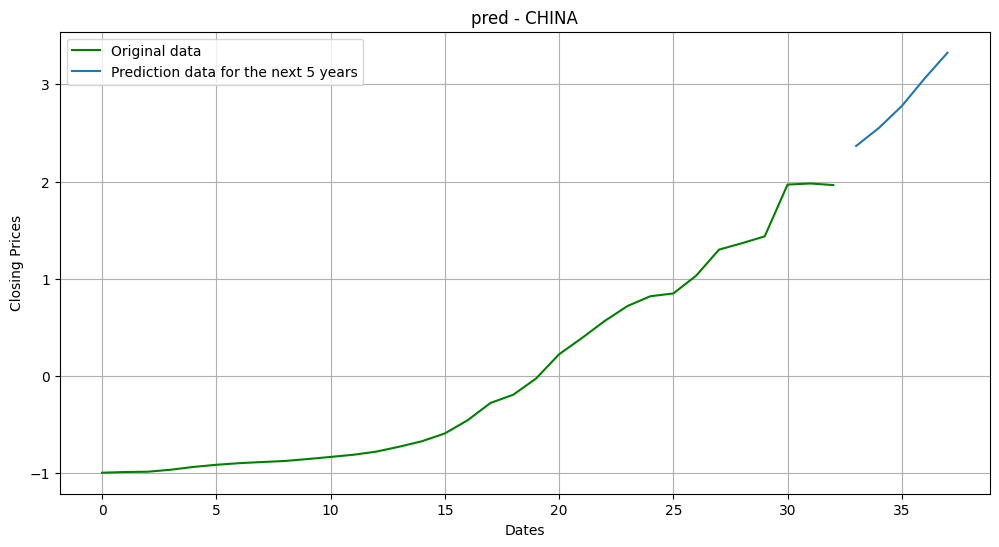

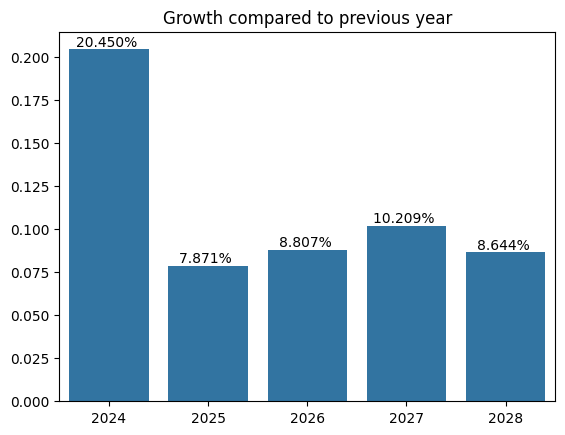







For DENMARK
(4, 3)
RMSE: 25797611277.09057
MAPE: 4.752536846631133%


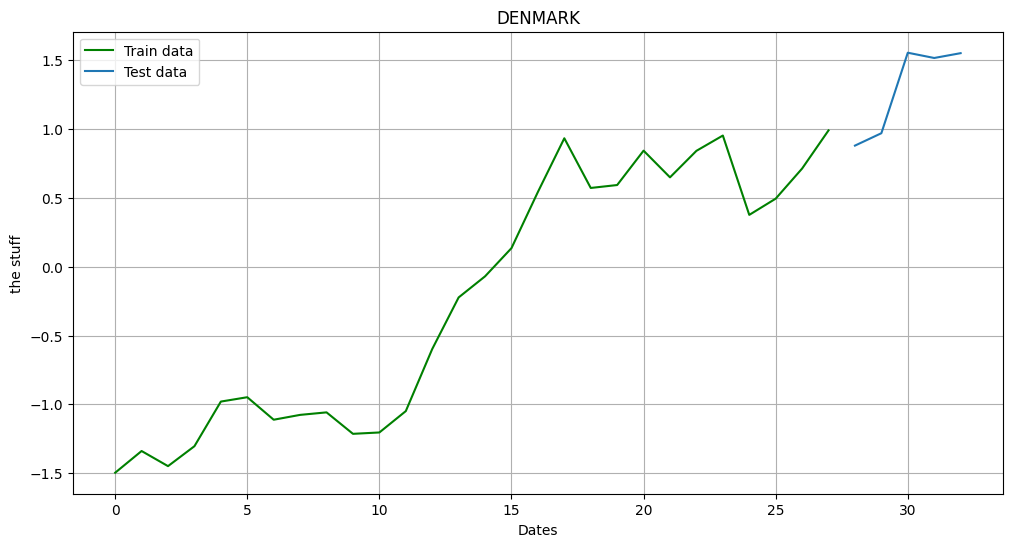

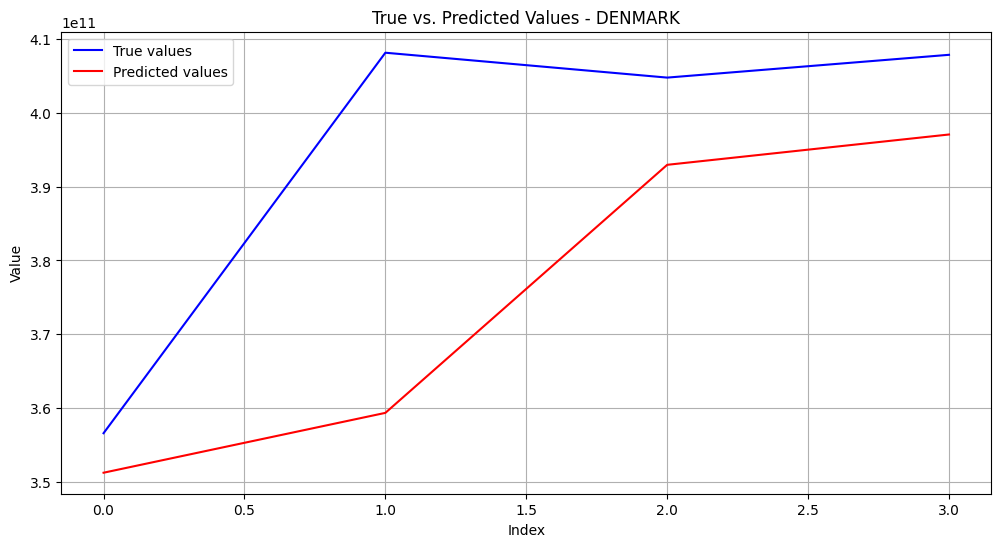

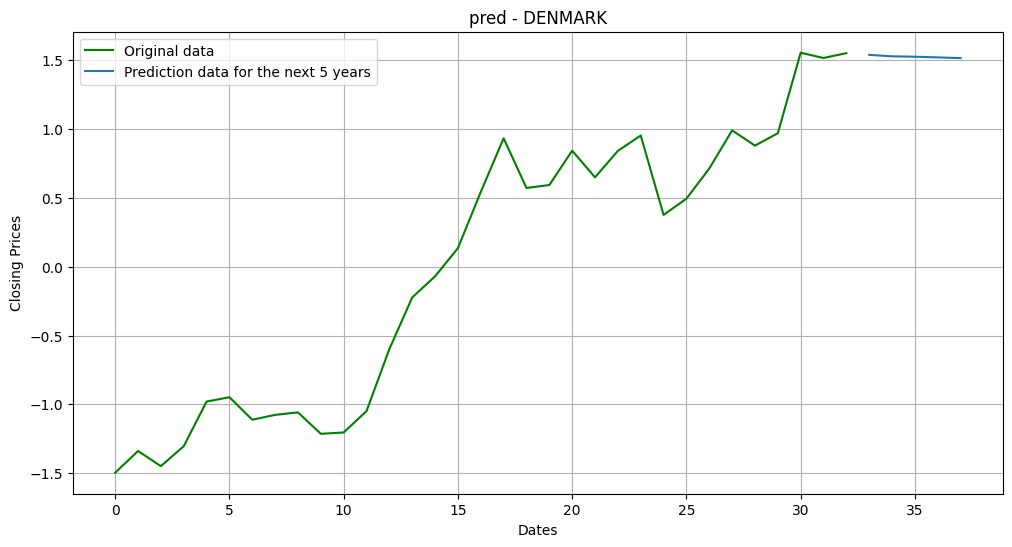

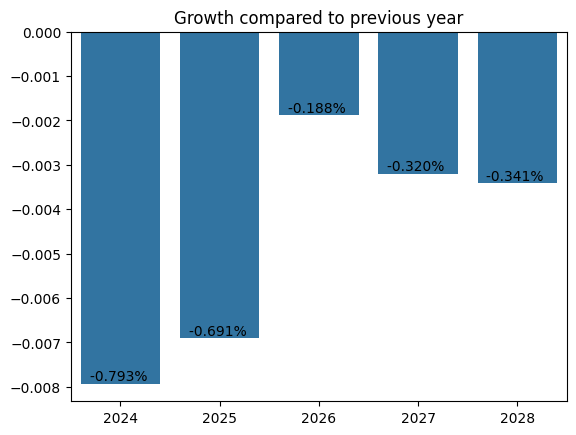







For ENGLAND
(4, 3)
RMSE: 267091876528.77118
MAPE: 6.935359731384451%


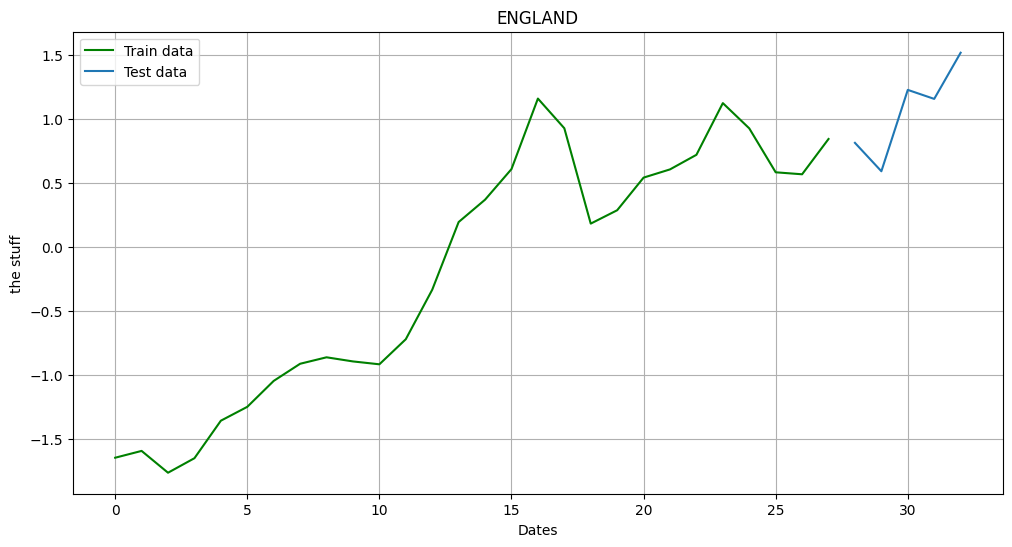

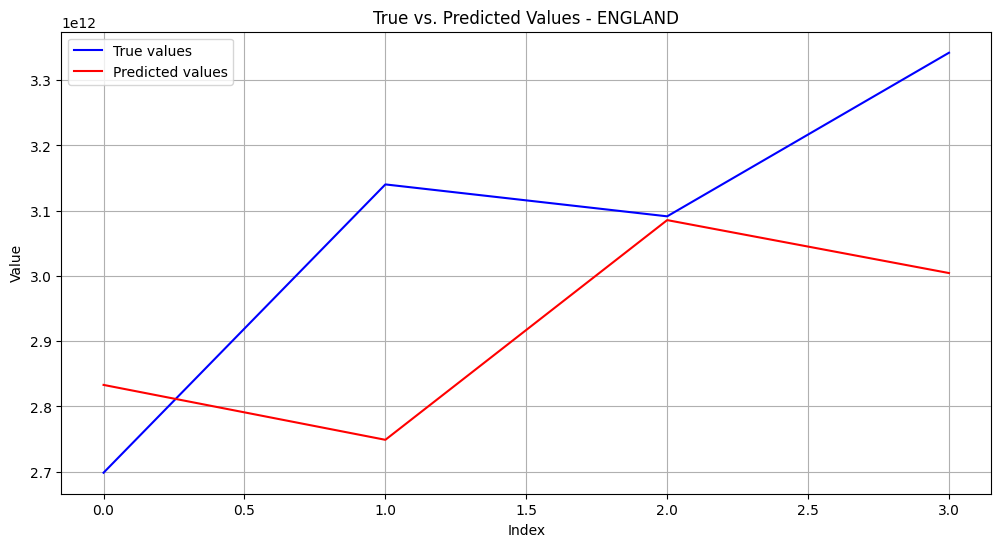

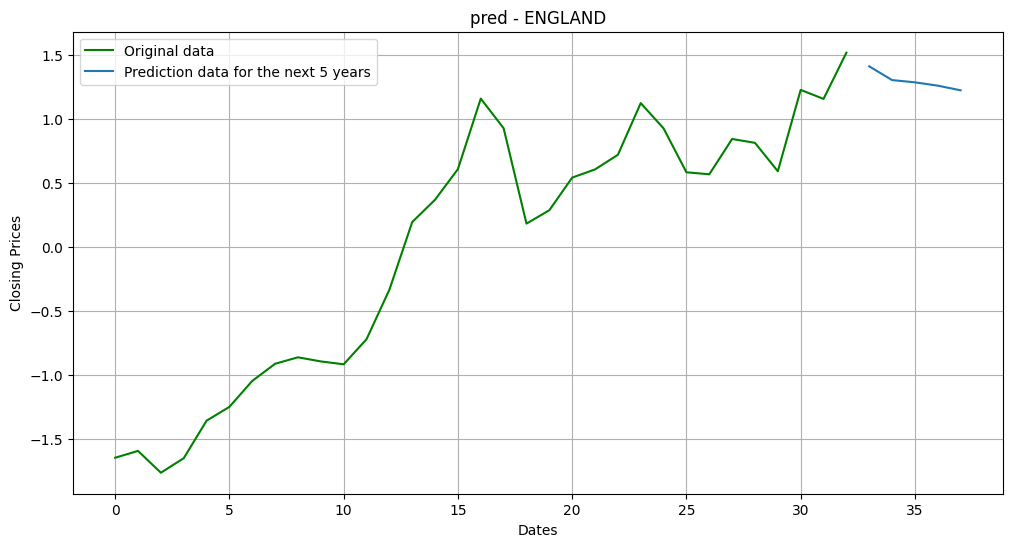

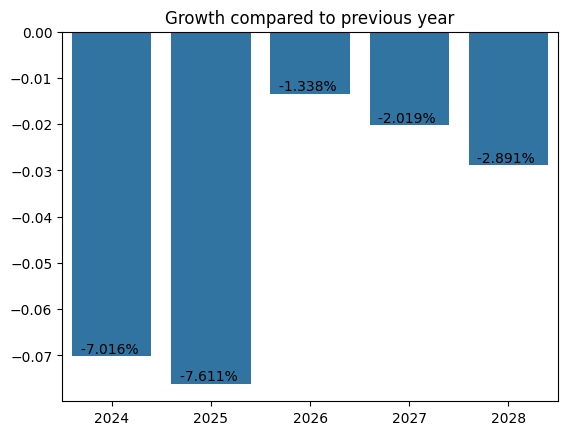







For FINLAND
(4, 3)
RMSE: 14764287953.19277
MAPE: 4.362509783106939%


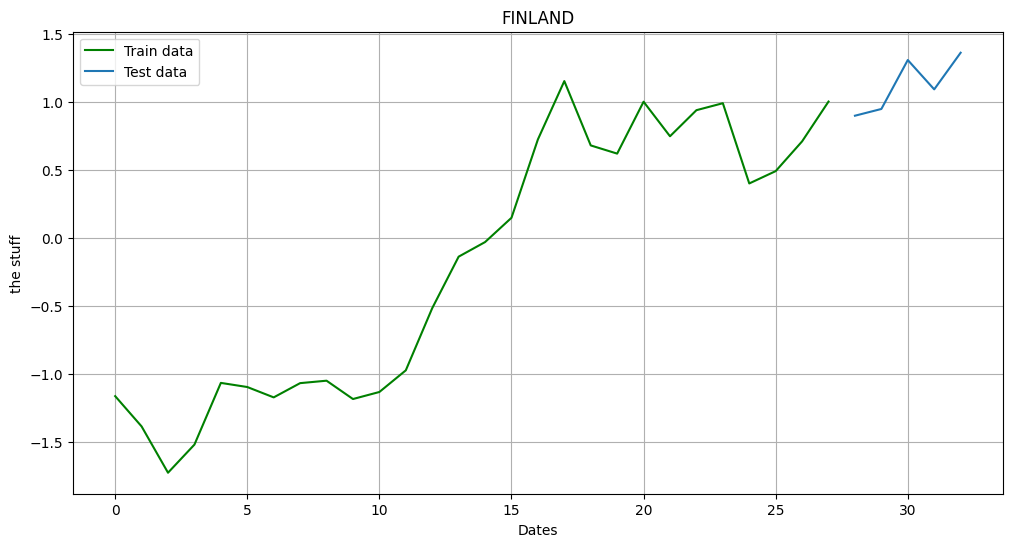

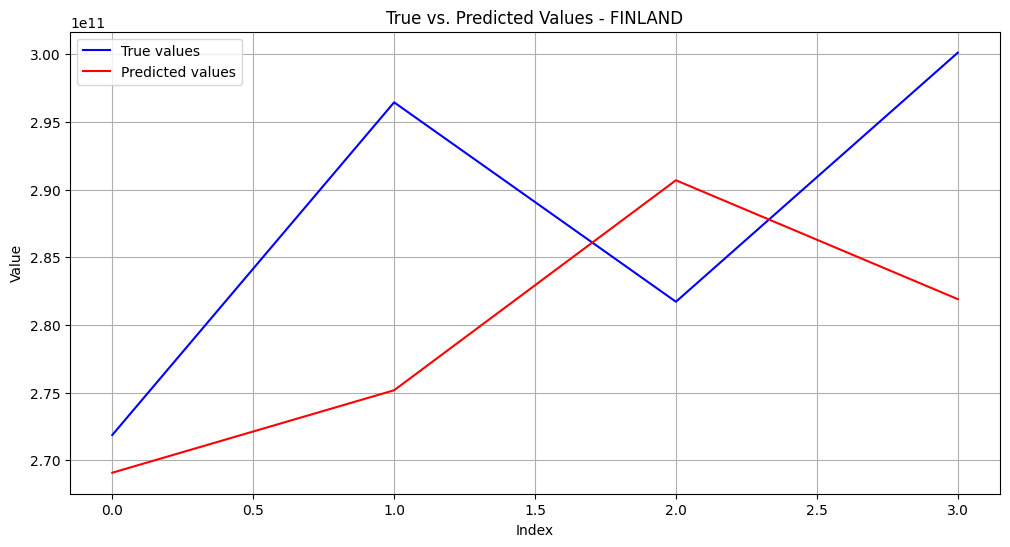

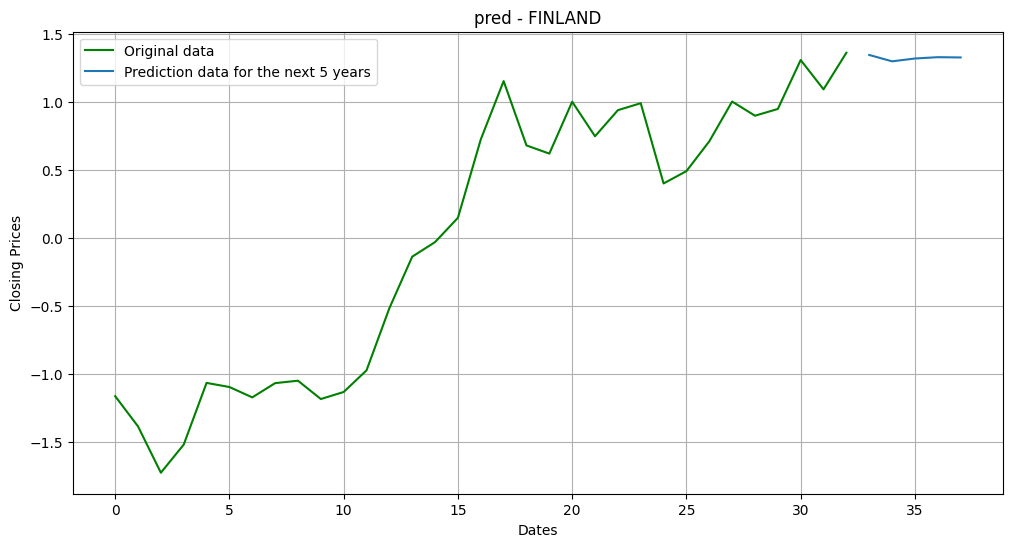

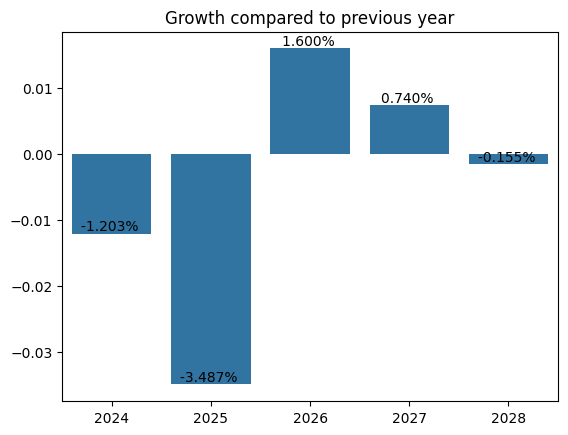







For FRANCE
(4, 3)
RMSE: 199330316351.06723
MAPE: 6.323450474602329%


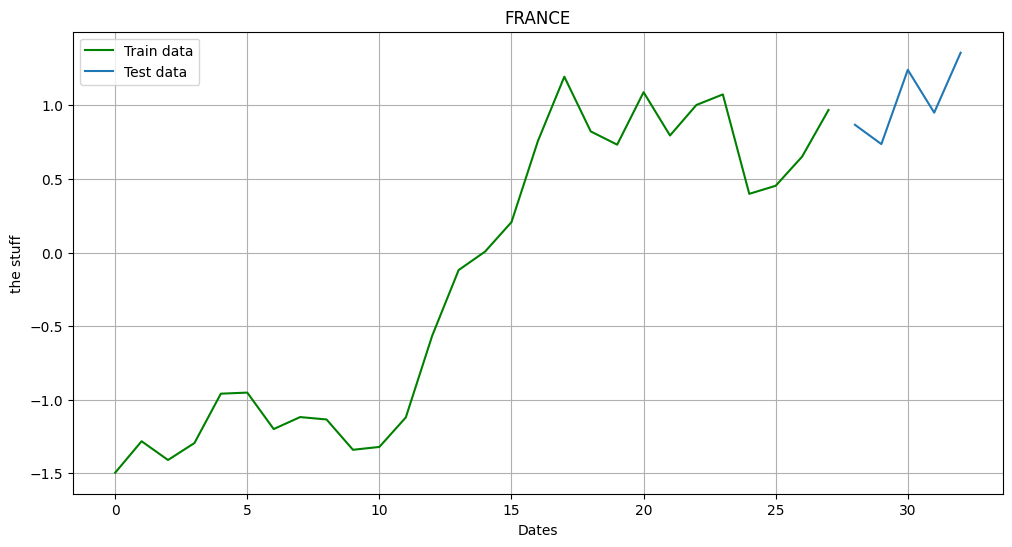

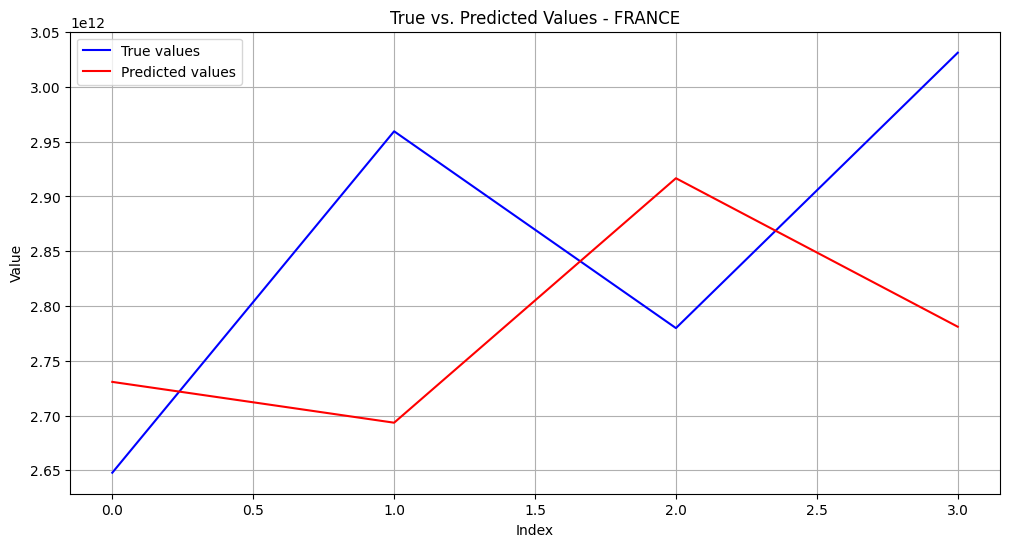

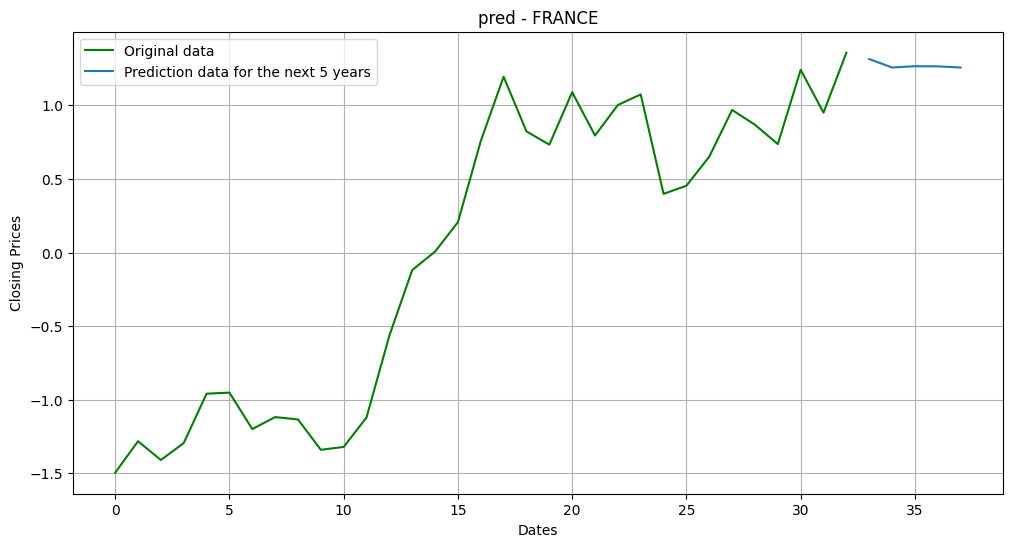

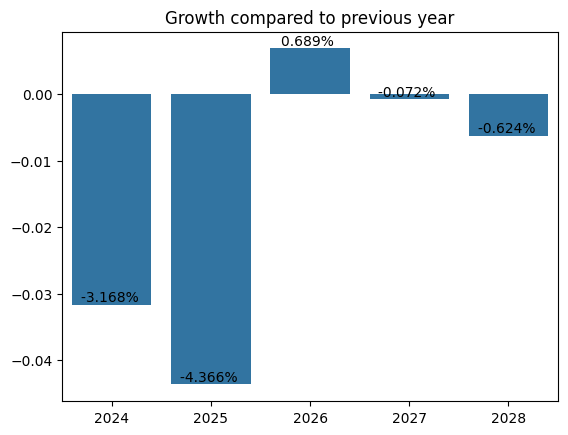







For GERMANY
(4, 3)
RMSE: 270255299652.83173
MAPE: 5.041792252381576%


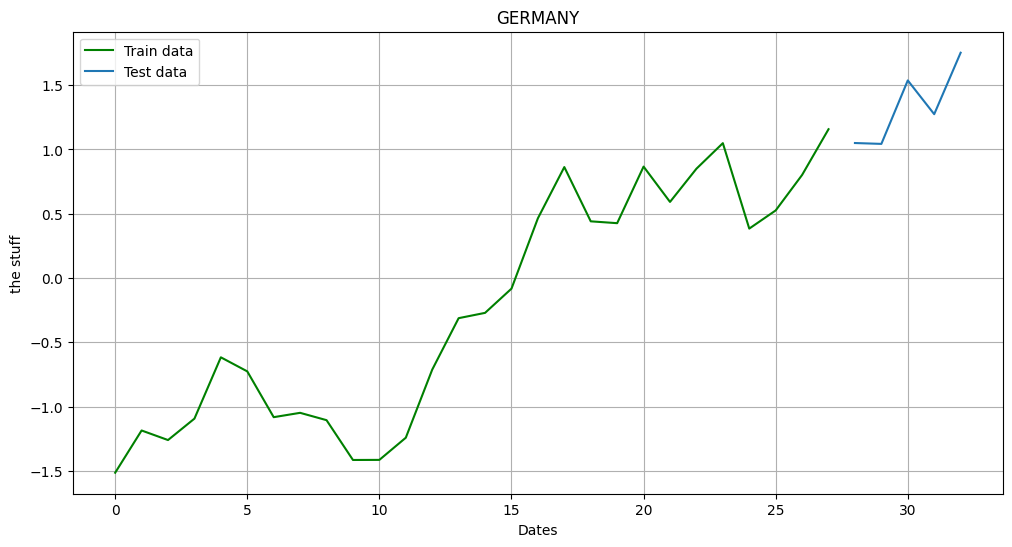

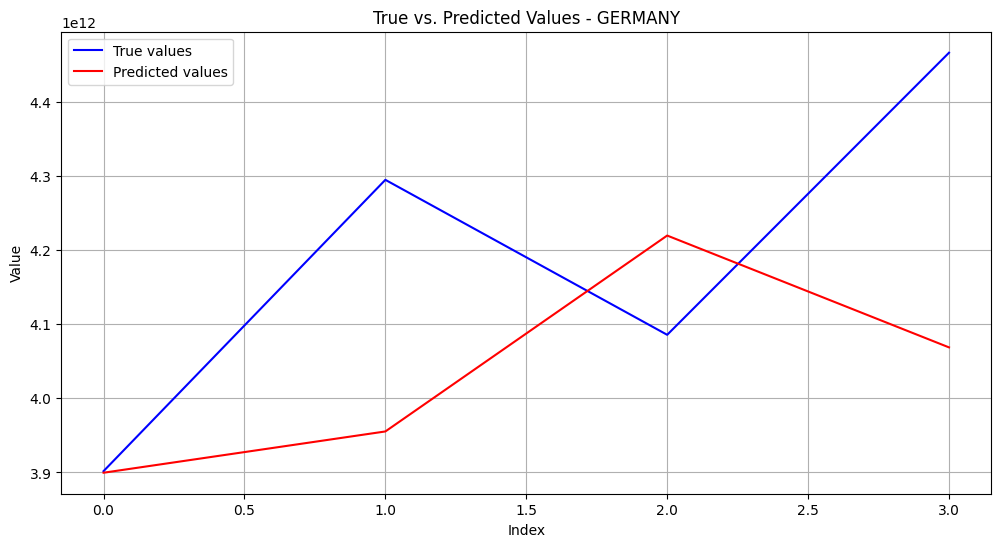

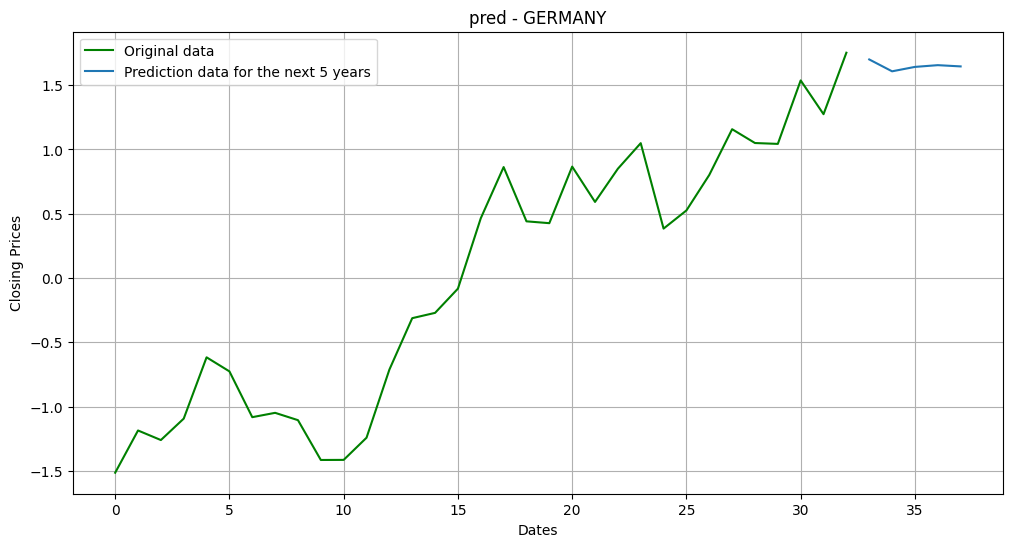

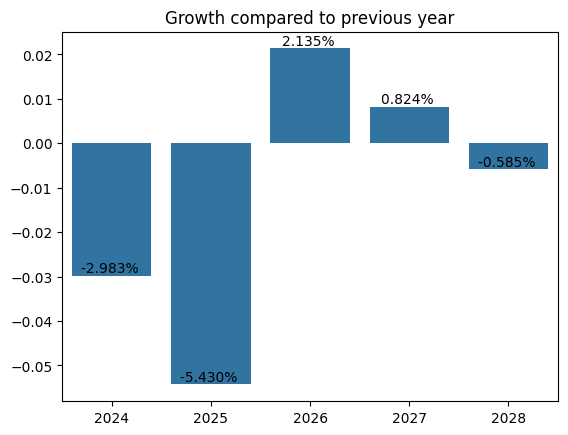







For INDIA
(4, 3)
RMSE: 216020753997.96814
MAPE: 5.882107589492992%


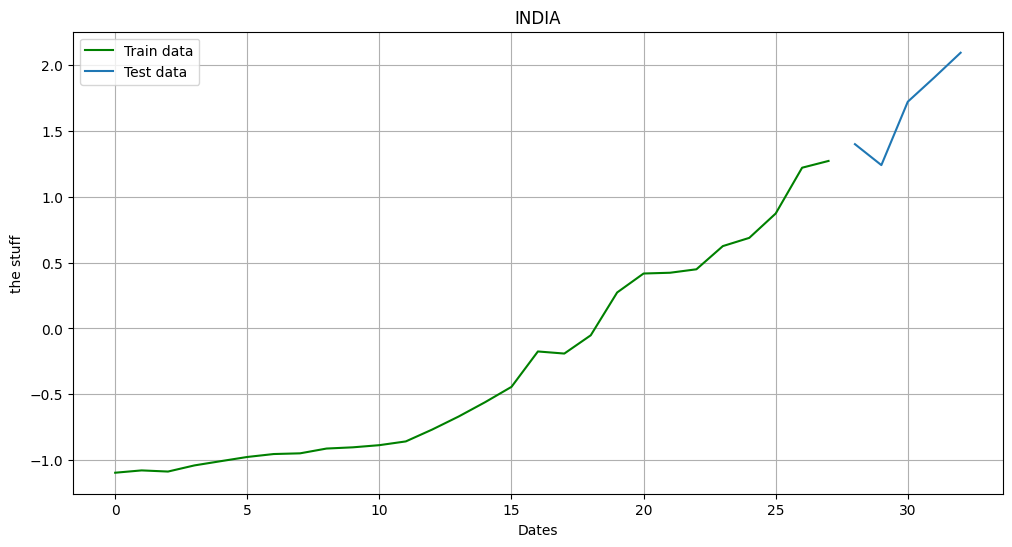

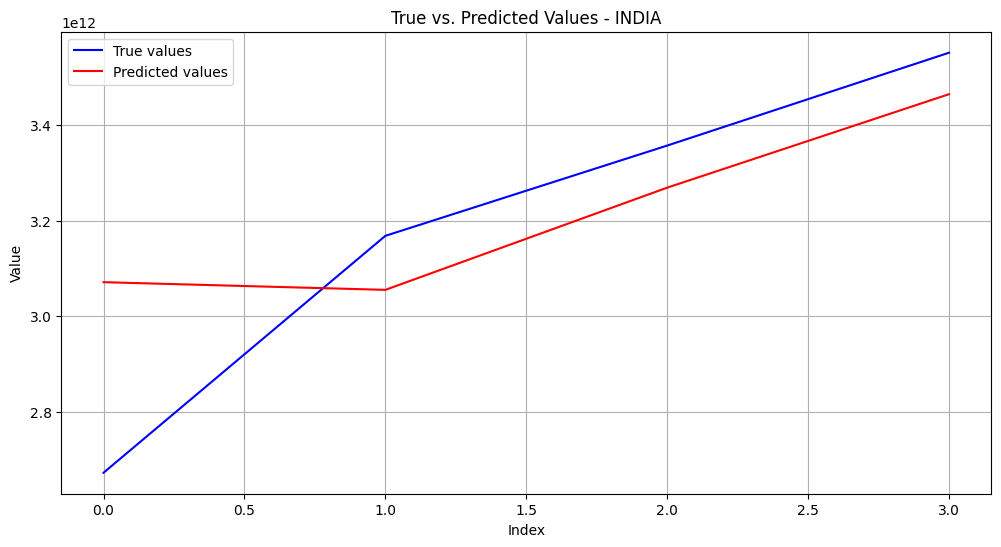

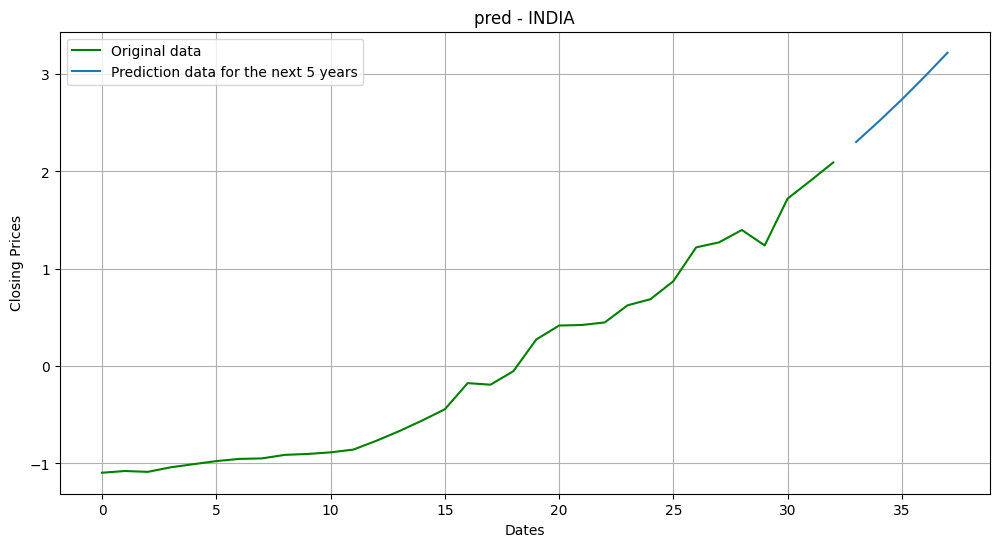

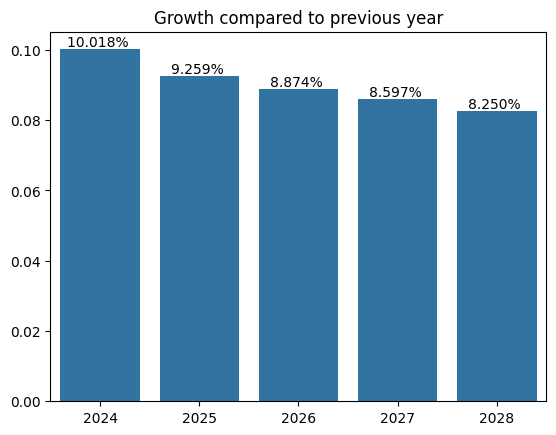







For ITALY
(4, 3)
RMSE: 163750084286.4772
MAPE: 7.155302697596226%


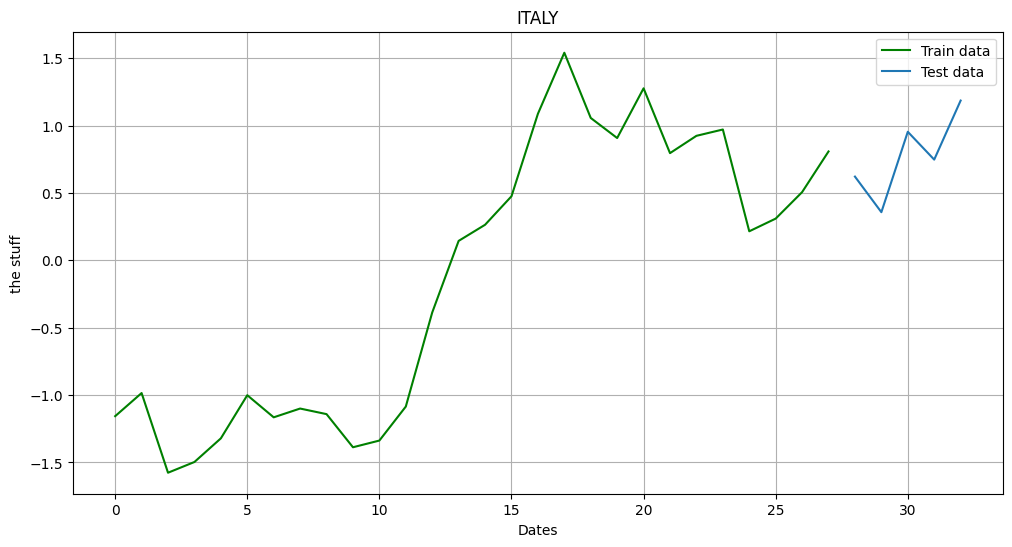

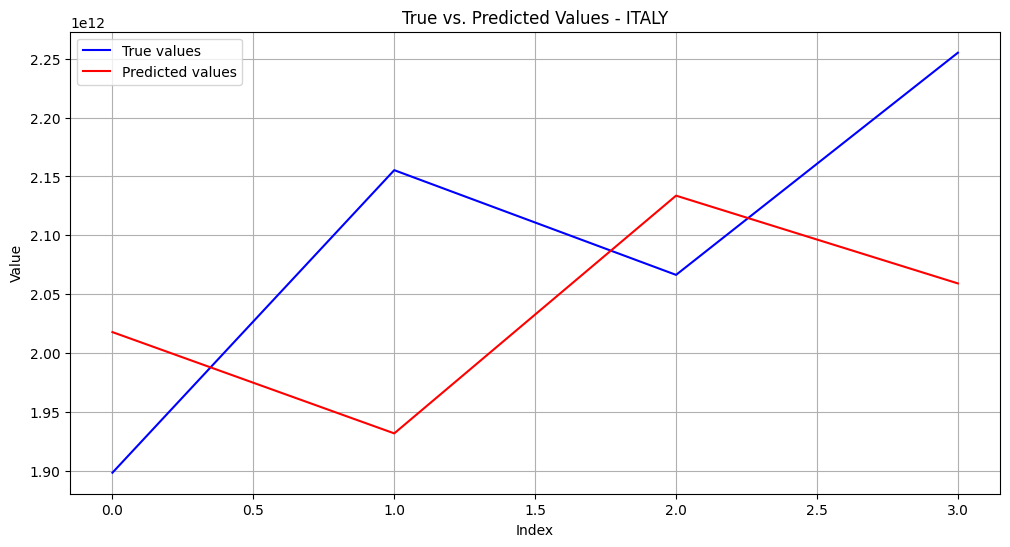

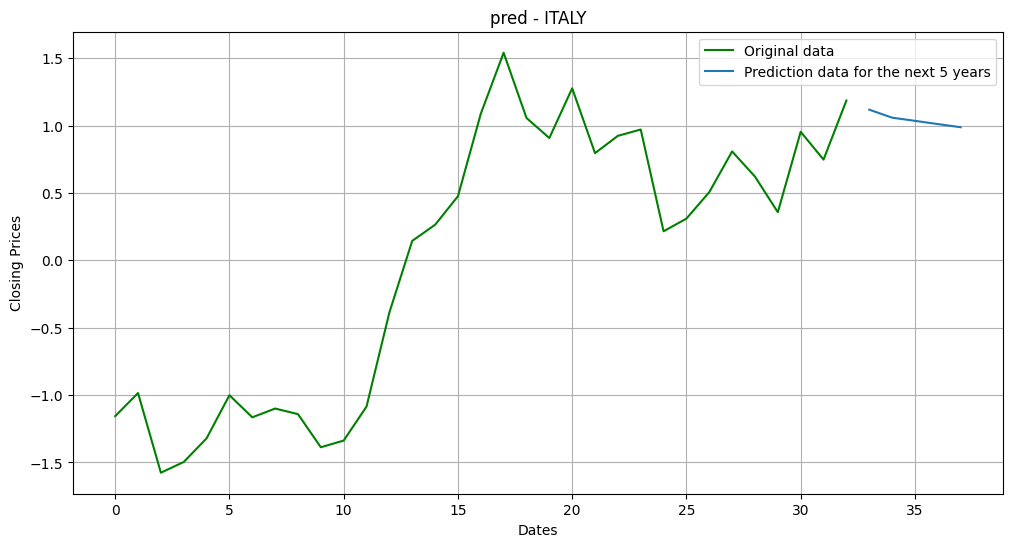

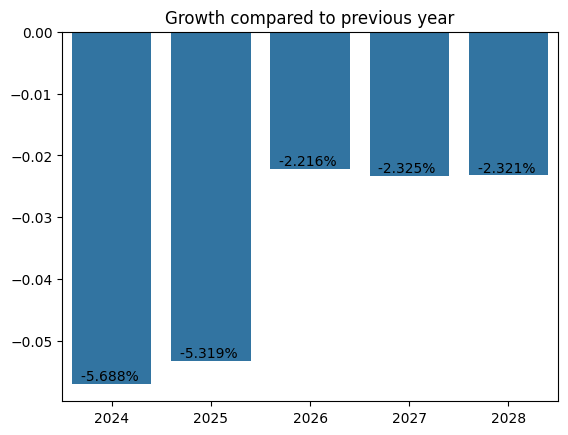







For JAPAN
(4, 3)
RMSE: 370366955537.41644
MAPE: 5.308907881870403%


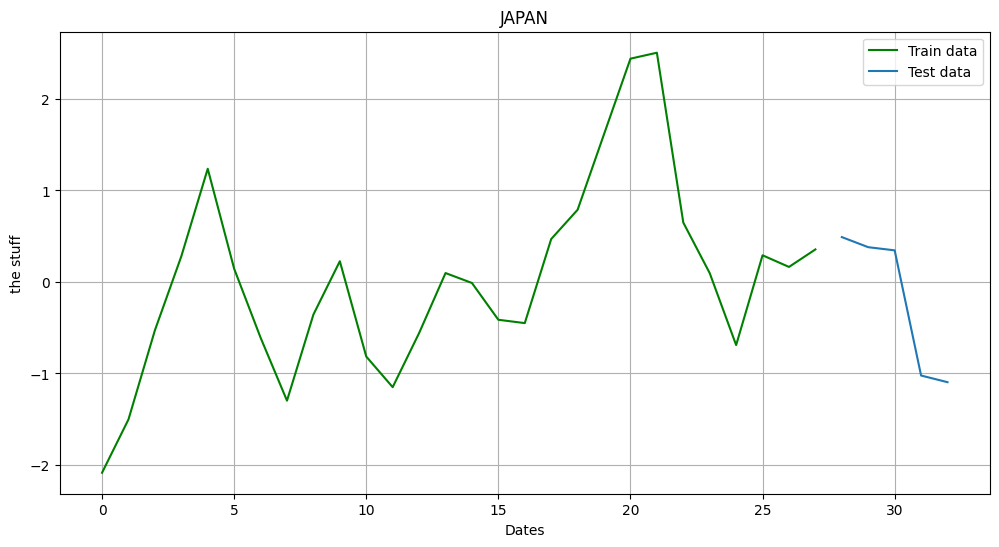

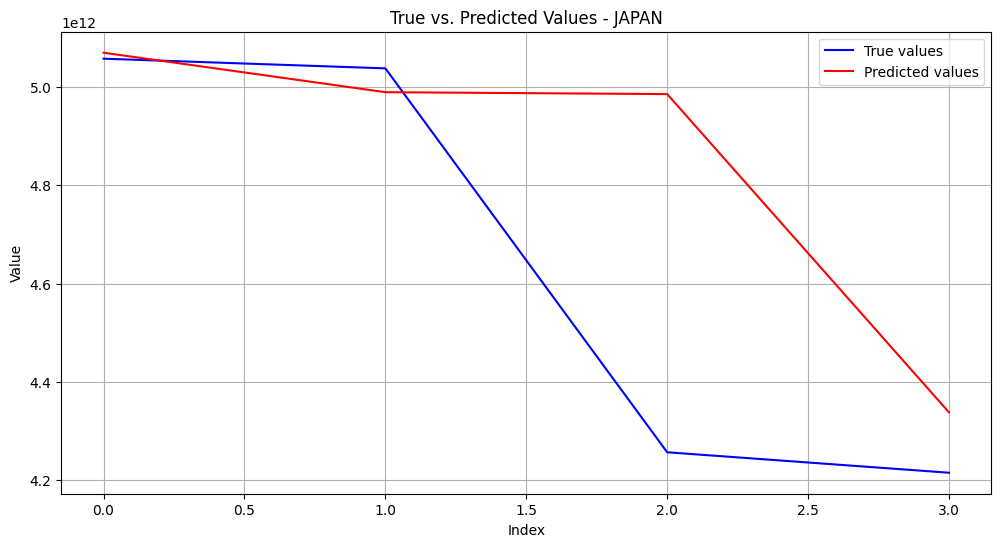

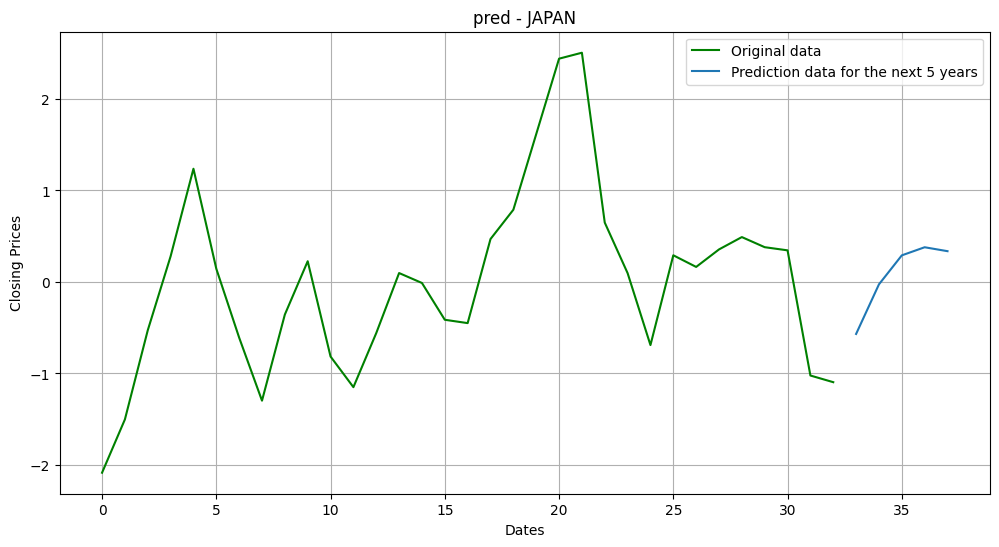

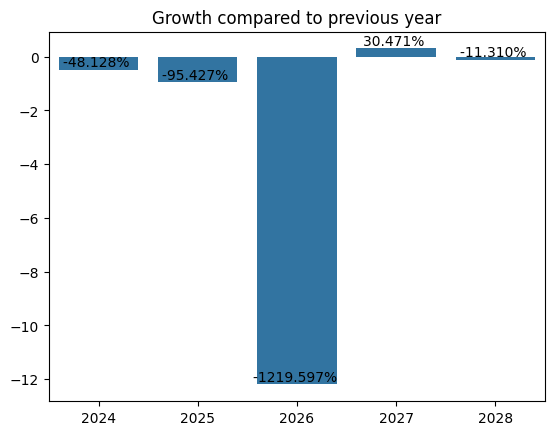







For KOREA
(4, 3)
RMSE: 102640468311.29369
MAPE: 5.585520289935357%


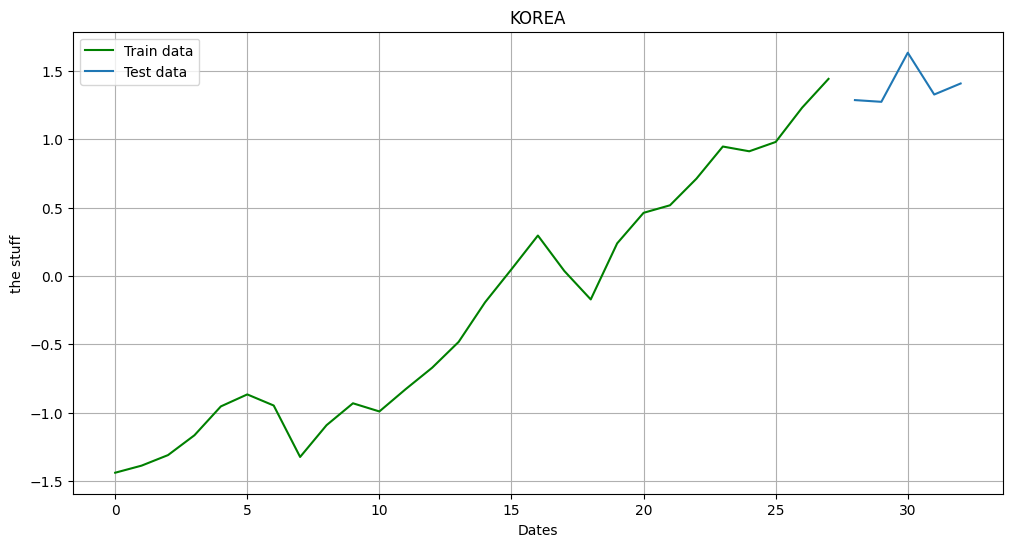

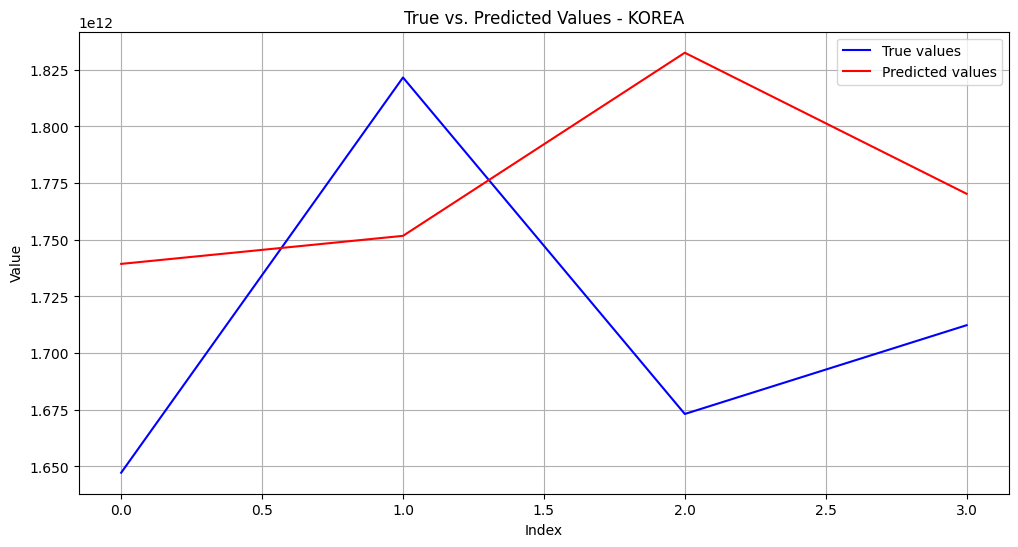

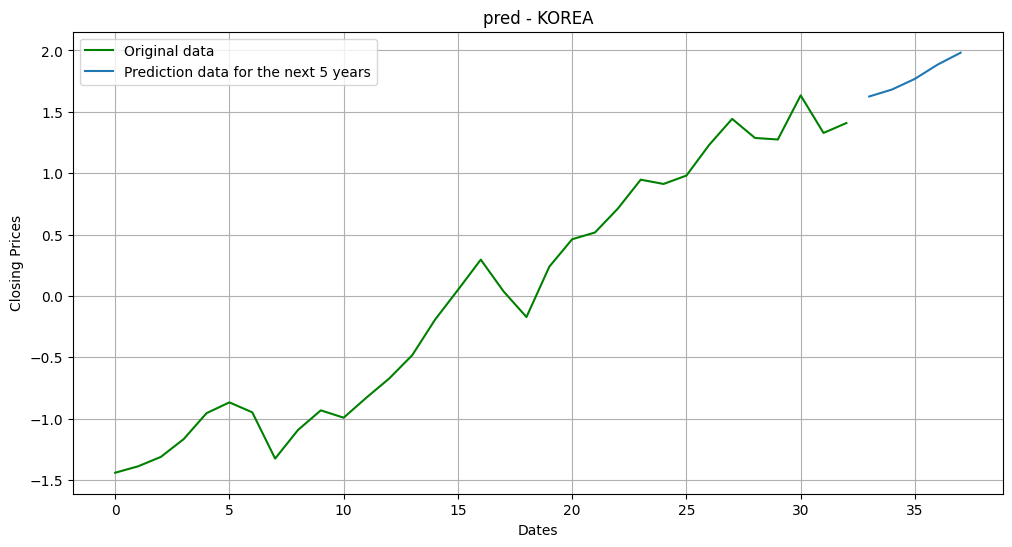

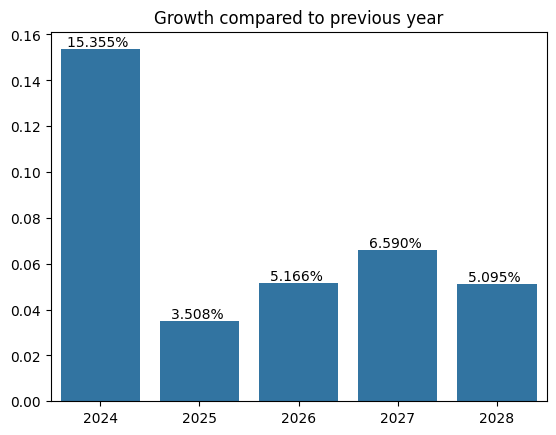







For NETHERLANDS
(4, 3)
RMSE: 83372796601.84573
MAPE: 5.726453292344978%


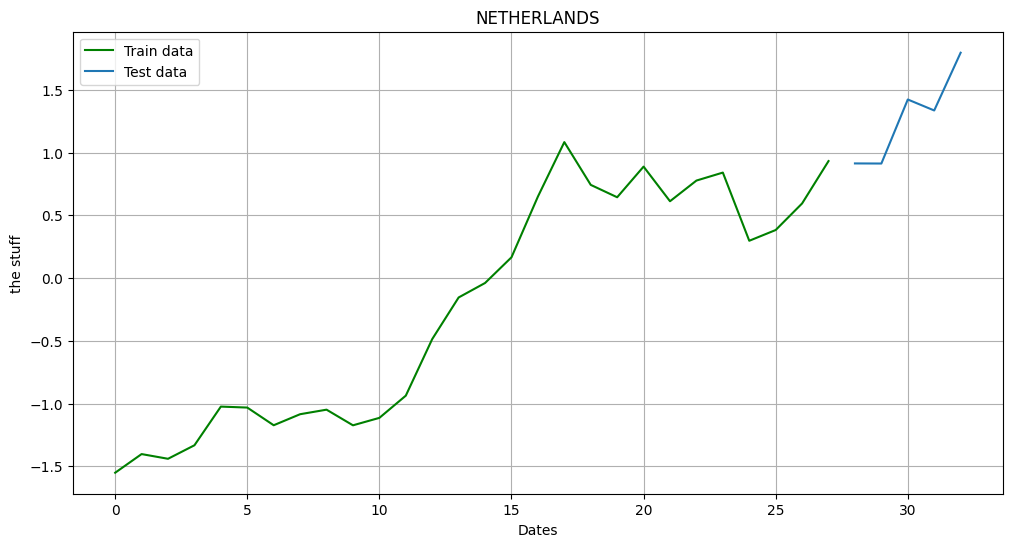

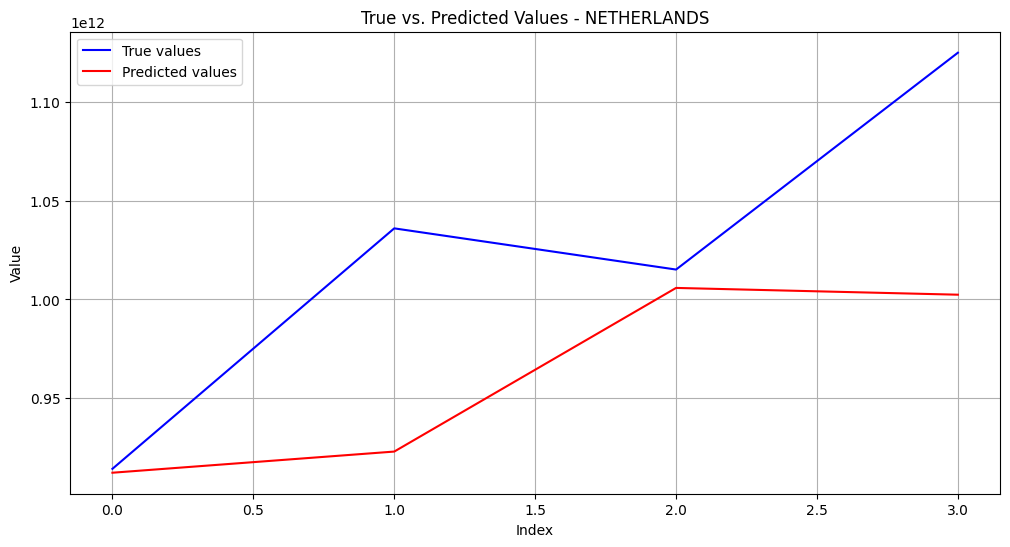

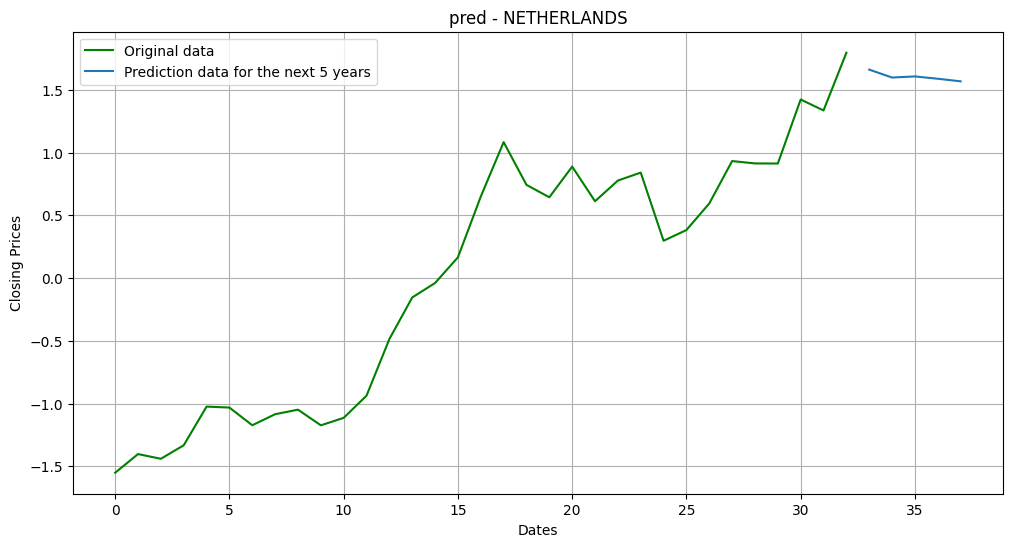

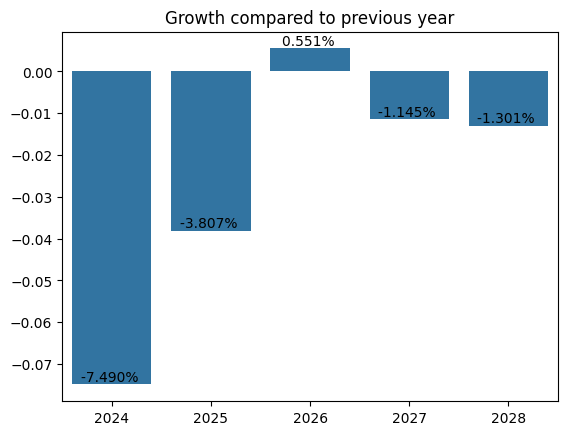







For RUSSIA
(4, 3)
RMSE: 312608695077.6208
MAPE: 14.985633324696051%


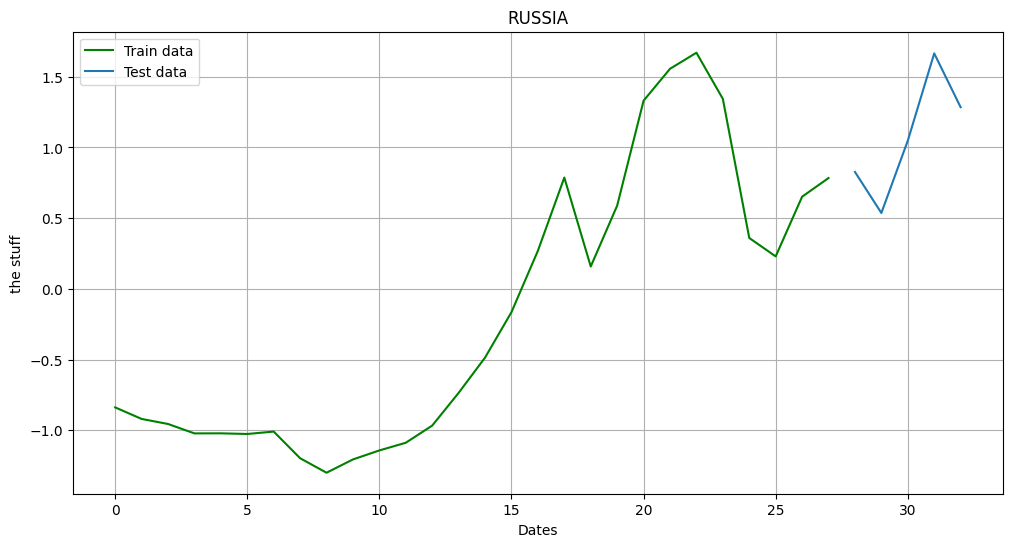

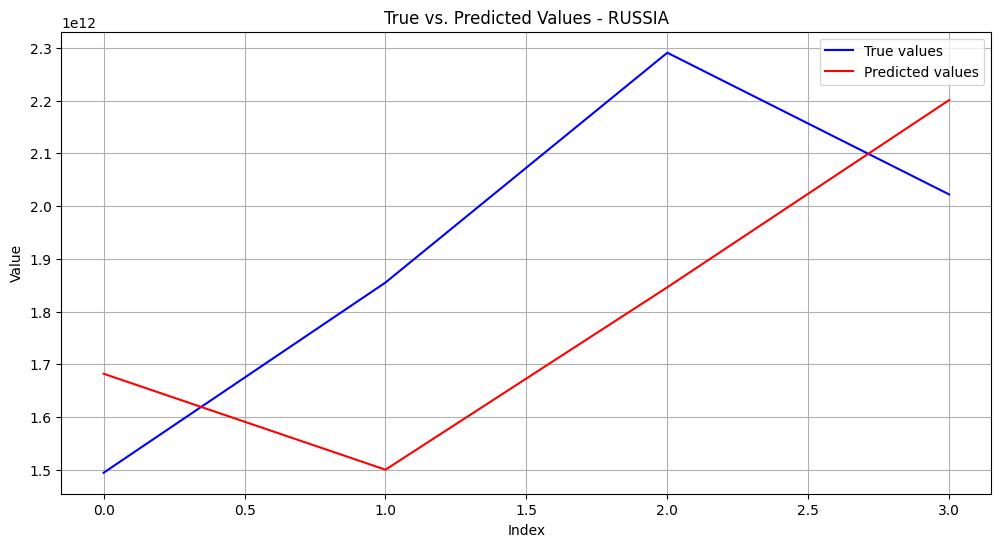

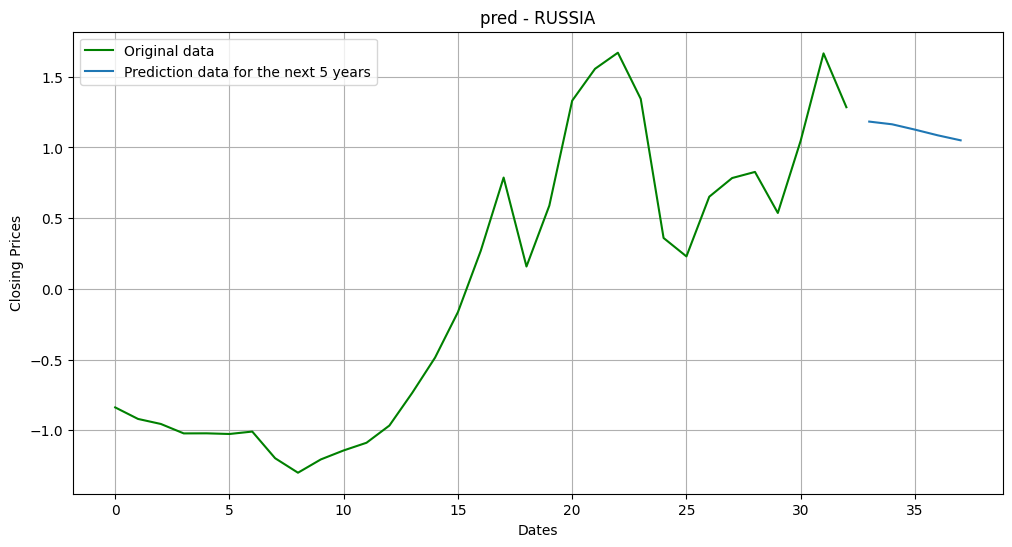

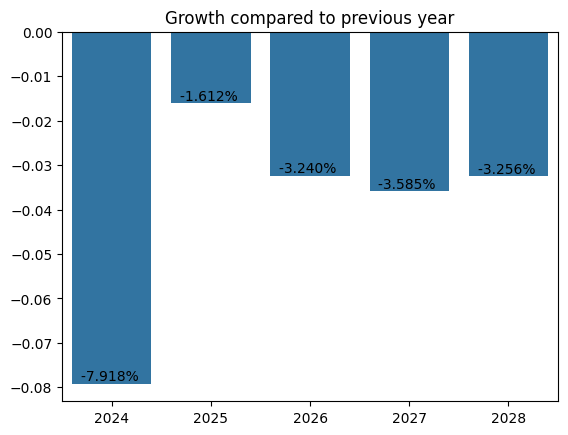







For SPAIN
(4, 3)
RMSE: 122699515669.12904
MAPE: 7.59828415755075%


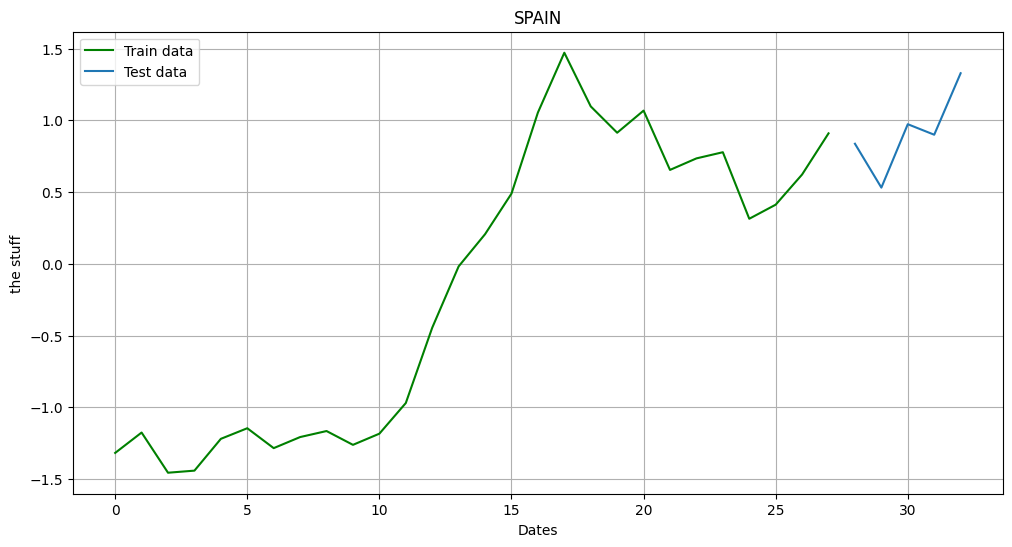

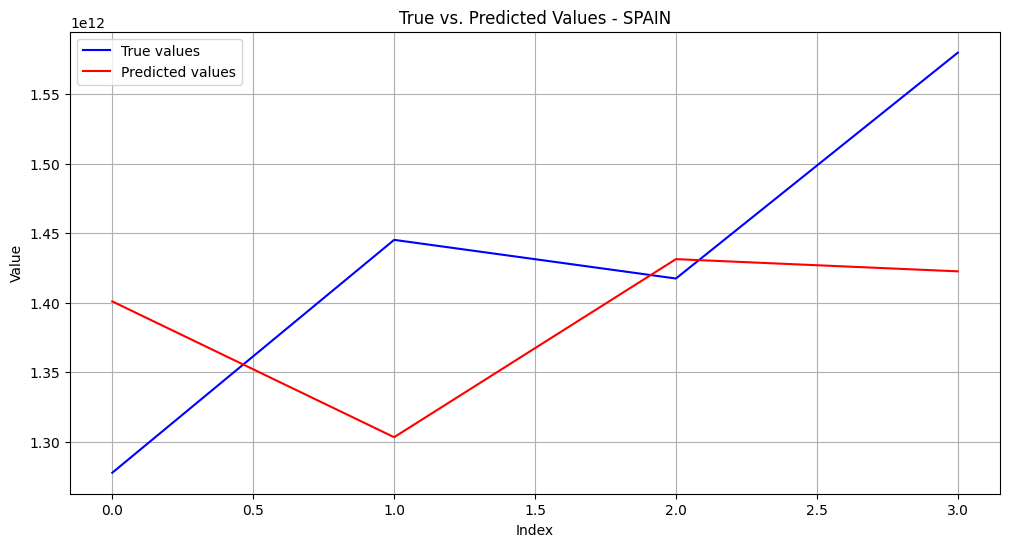

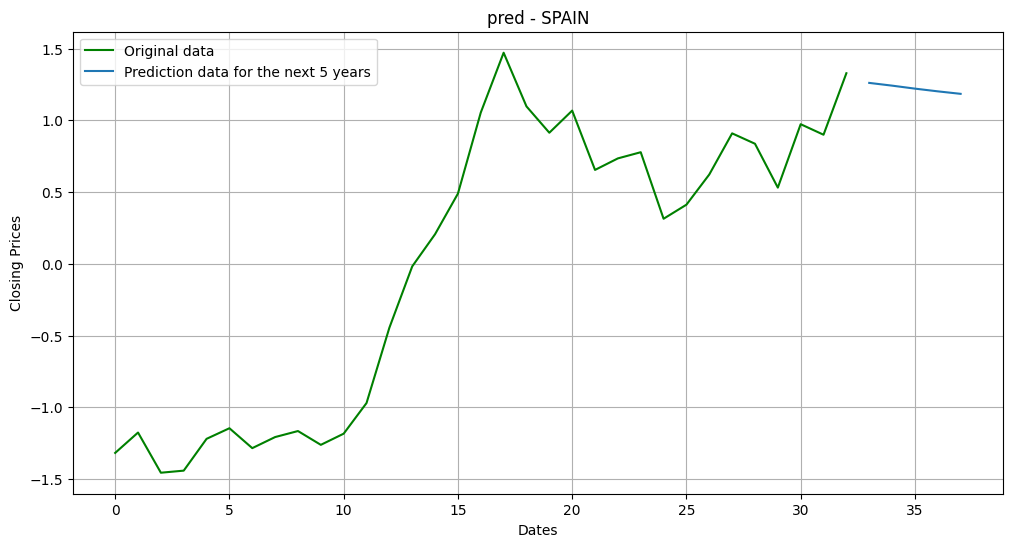

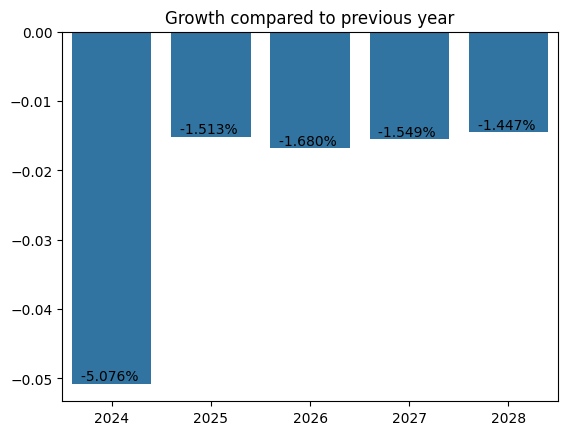







For SWEDEN
(4, 3)
RMSE: 44696069047.51755
MAPE: 5.038420980810476%


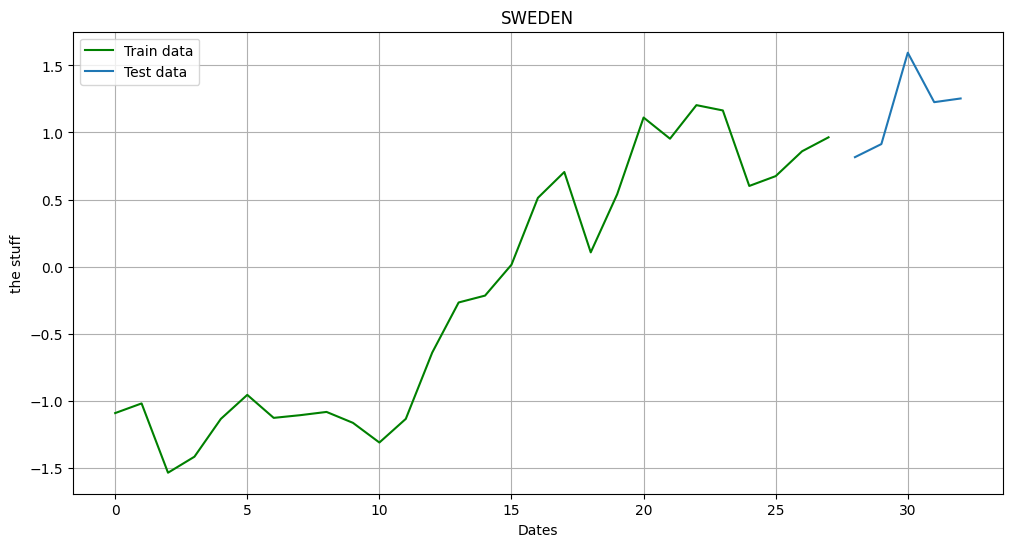

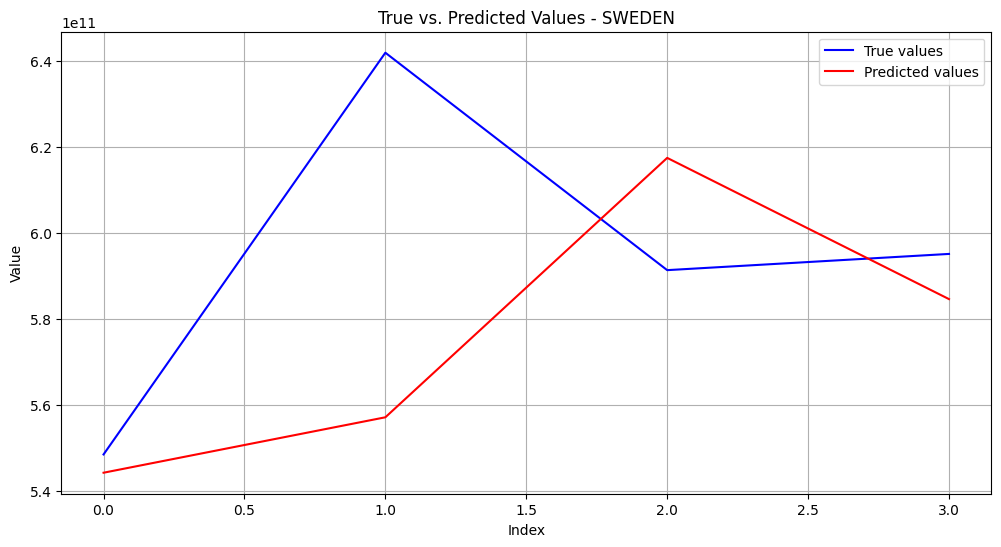

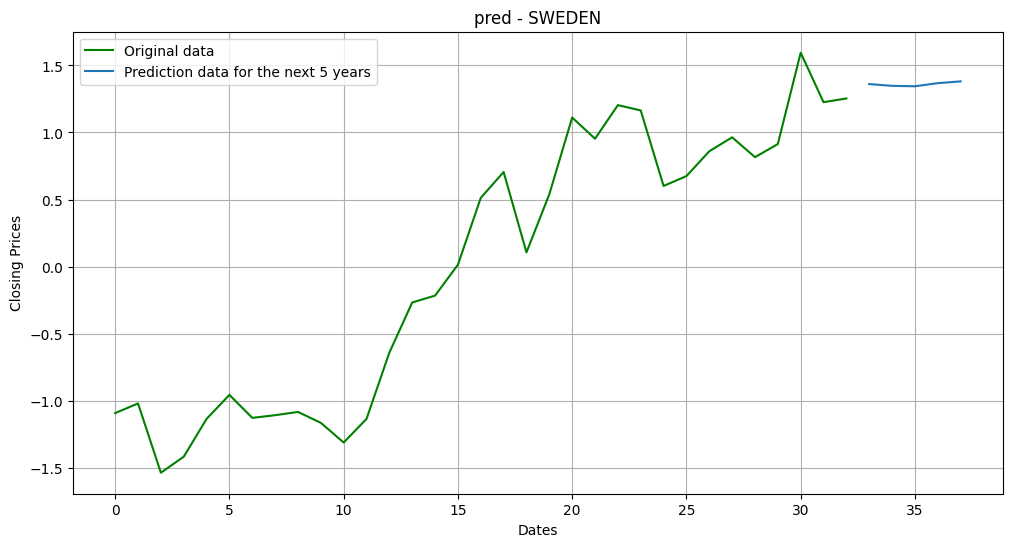

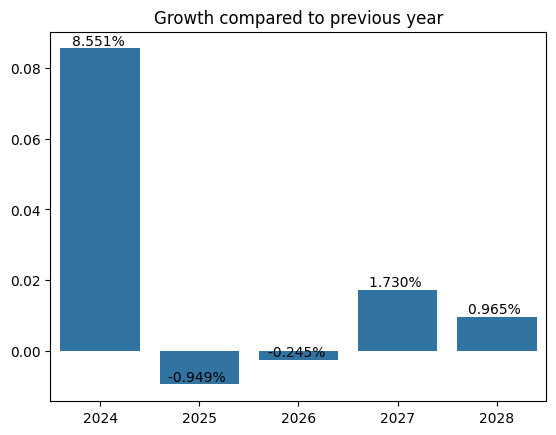







For SWITZERLAND
(4, 3)
RMSE: 47138067567.88778
MAPE: 4.475083797997236%


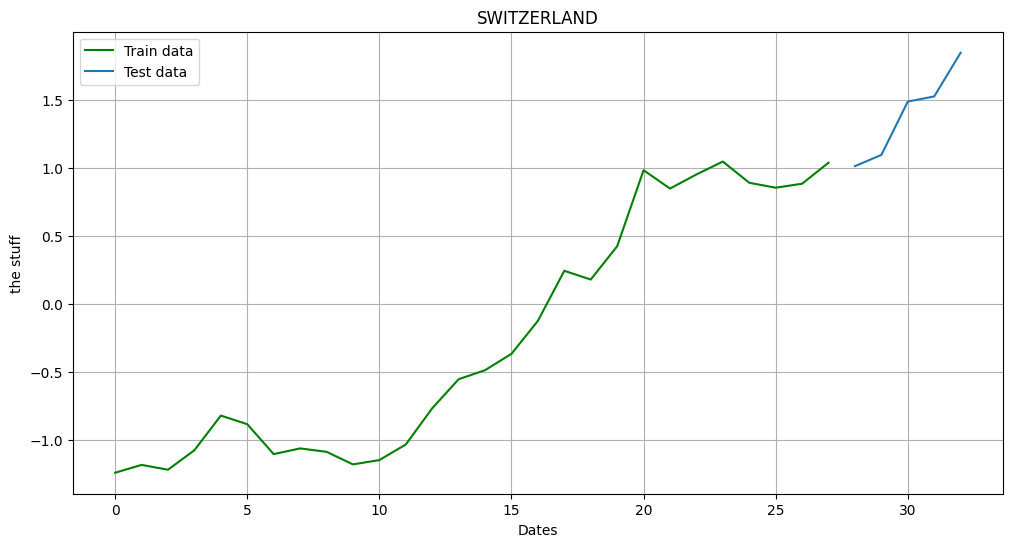

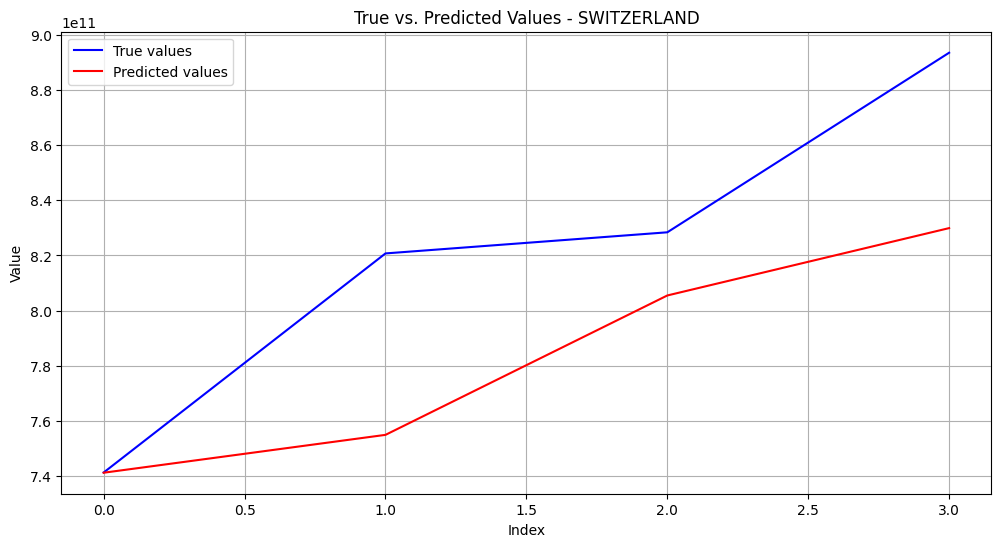

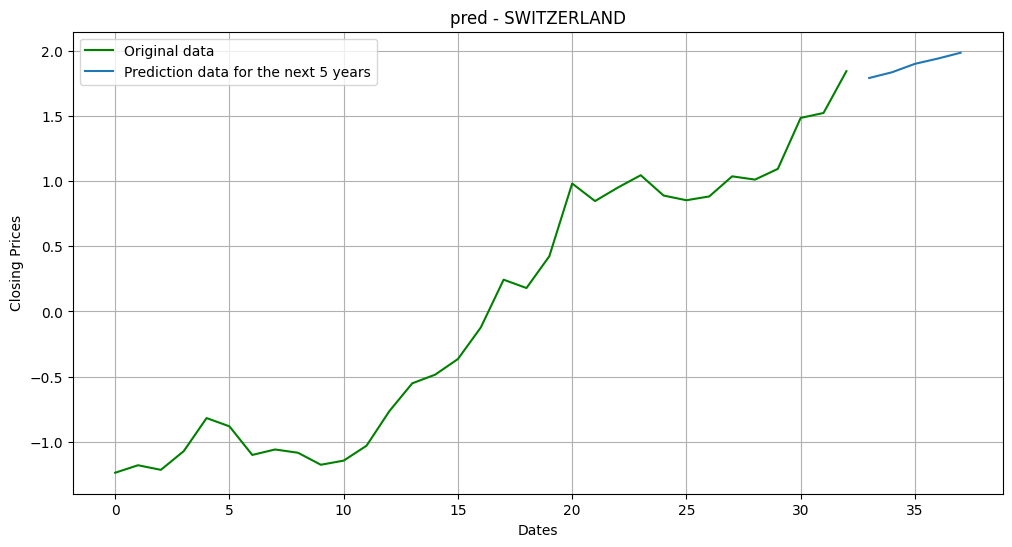

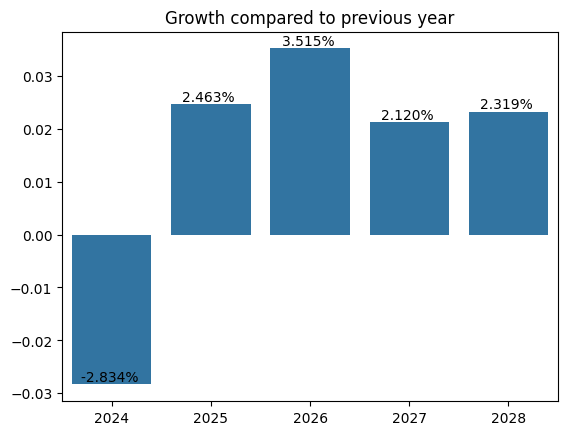







For US
(4, 3)
RMSE: 1786699661946.5046
MAPE: 6.3252175051034865%


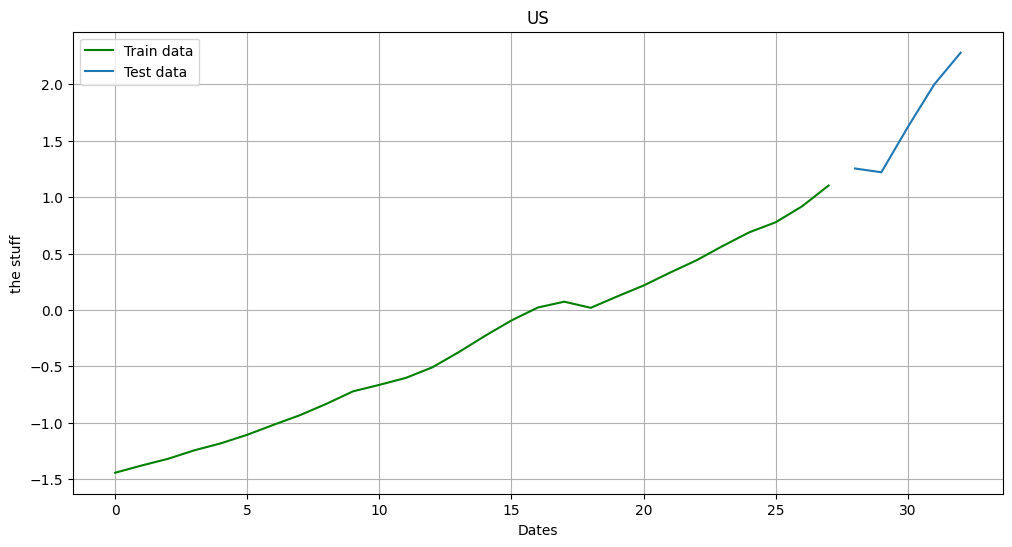

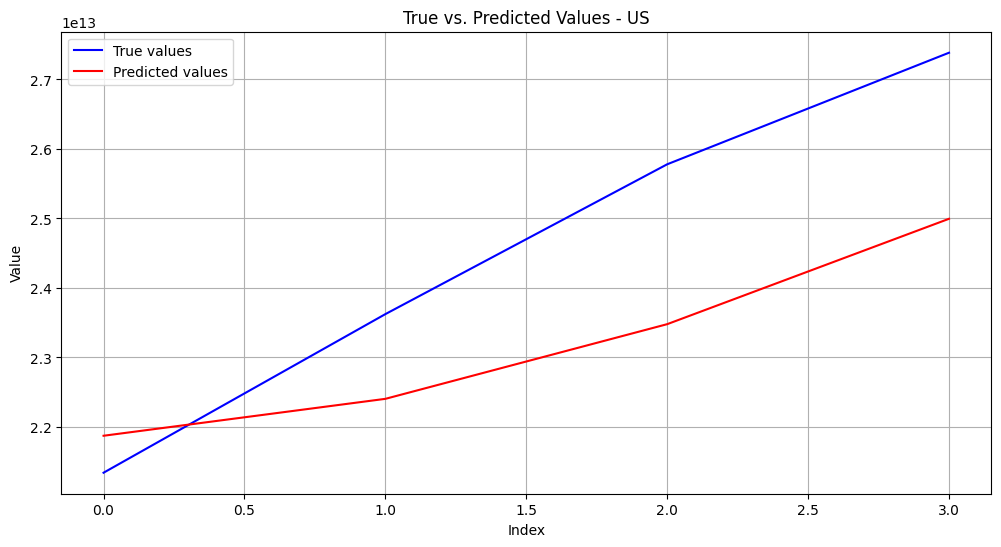

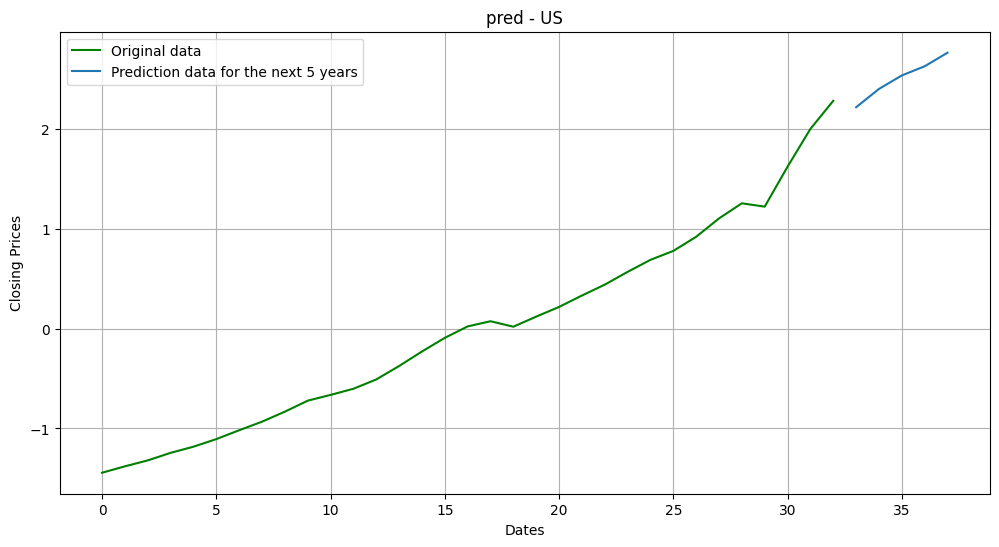

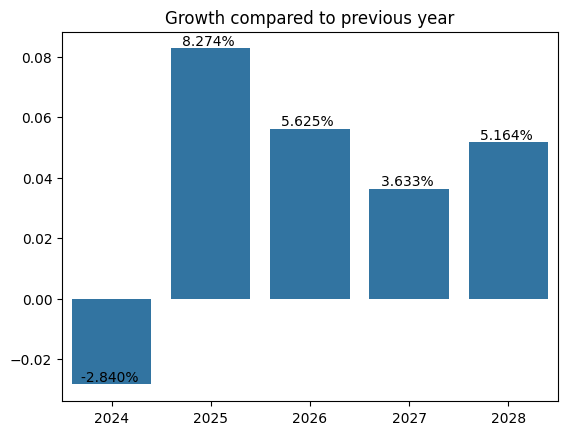

In [181]:
data_folder = 'D:\Advanced_Python\projects\Country_Economics\Imputed_data'
data_frames_full = {}

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(data_folder, file))

        forecast_a_mf(df,name.upper())